### Library Installation

In the following cell, we are installing several Python libraries necessary for our analysis:

- `pandas`, `matplotlib`, and `seaborn` for data manipulation and visualization.
- `folium` for interactive maps.
- `scipy` and `numpy` for scientific computing and advanced mathematical functions.

**Note**: Libraries like `os`, `json`, and `zipfile` are part of Python's standard library and do not require installation.

In [237]:
# To install the required libraries, remove the '#' from the start of each line and run this cell.

#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install folium
#!pip install scipy
#!pip install numpy
#!pip install IPython
#!pip install ipyleaflet
#!pip install dash pandas plotly

In [27]:
# Core libraries
import os
import json
import zipfile

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from IPython.display import Image

# Statistical analysis
import scipy.stats as stats
from scipy.stats import shapiro, levene, mannwhitneyu, chi2_contingency, ttest_ind, kruskal

# Web application
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
def count_duplicated_rows(df):
    return df.duplicated().sum()

def show_duplicated_rows(df):
    duplicated_rows = df[df.duplicated()]
    return duplicated_rows

def count_nan_values(df):
    return df.isnull().sum()

def detect_outliers(df, column_names):
    if isinstance(column_names, str):
        column_names = [column_names]

    outliers = pd.DataFrame()

    for column_name in column_names:
  
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

        column_outliers['Outlier_Column'] = column_name

        outliers = outliers.append(column_outliers)

    return outliers

## Dublin Bike Data for the month of August 2022

In [29]:
bikes_data_aug_2022_dublin = pd.read_csv("dublinbike-historical-data-2022-08.csv")

bikes_data_aug_2022_dublin.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2022-08-01 00:00:02,2022-07-31 23:50:28,CLARENDON ROW,31,12,19,OPEN,Clarendon Row,53.3409,-6.26250
1,2,2022-08-01 00:00:02,2022-07-31 23:56:07,BLESSINGTON STREET,20,5,14,OPEN,Blessington Street,53.3568,-6.26814
2,3,2022-08-01 00:00:02,2022-07-31 23:53:59,BOLTON STREET,20,8,12,OPEN,Bolton Street,53.3512,-6.26986
3,4,2022-08-01 00:00:02,2022-07-31 23:59:22,GREEK STREET,20,1,17,OPEN,Greek Street,53.3469,-6.27298
4,5,2022-08-01 00:00:02,2022-07-31 23:58:33,CHARLEMONT PLACE,40,19,21,OPEN,Charlemont Street,53.3307,-6.26018


In [30]:
bikes_data_aug_2022_dublin.shape

(168144, 11)

In [31]:
bikes_data_size_dublin = bikes_data_aug_2022_dublin.size
print(f'Total number of elements in the DataFrame: {bikes_data_size_dublin}.')

Total number of elements in the DataFrame: 1849584.


In [32]:
bikes_data_aug_2022_dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168144 entries, 0 to 168143
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   STATION ID             168144 non-null  int64  
 1   TIME                   168144 non-null  object 
 2   LAST UPDATED           168144 non-null  object 
 3   NAME                   168144 non-null  object 
 4   BIKE_STANDS            168144 non-null  int64  
 5   AVAILABLE_BIKE_STANDS  168144 non-null  int64  
 6   AVAILABLE_BIKES        168144 non-null  int64  
 7   STATUS                 168144 non-null  object 
 8   ADDRESS                168144 non-null  object 
 9   LATITUDE               168144 non-null  float64
 10  LONGITUDE              168144 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 14.1+ MB


In [33]:
bikes_data_aug_2022_dublin.describe()

,STATION ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,LATITUDE,LONGITUDE
count,168144.000000,168144.000000,168144.000000,168144.000000,168144.000000,168144.000000
mean,59.035398,32.000000,19.990675,11.728893,53.345542,-6.264251
std,34.192149,7.488066,11.135194,9.713809,0.007604,0.017932
min,1.000000,16.000000,0.000000,0.000000,53.330100,-6.310020
25%,29.000000,29.000000,12.000000,3.000000,53.339800,-6.275070
50%,59.000000,30.000000,20.000000,10.000000,53.344600,-6.262980
75%,89.000000,40.000000,29.000000,18.000000,53.350900,-6.251560
max,117.000000,40.000000,40.000000,40.000000,53.360000,-6.230850


In [34]:
print(f"Number of duplicate rows in the bike dataset for Dublin is {count_duplicated_rows(bikes_data_aug_2022_dublin)}.")

Number of duplicate rows in the bike dataset for Dublin is 0.


In [35]:
count_nan_values(bikes_data_aug_2022_dublin)

STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
AVAILABLE_BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64

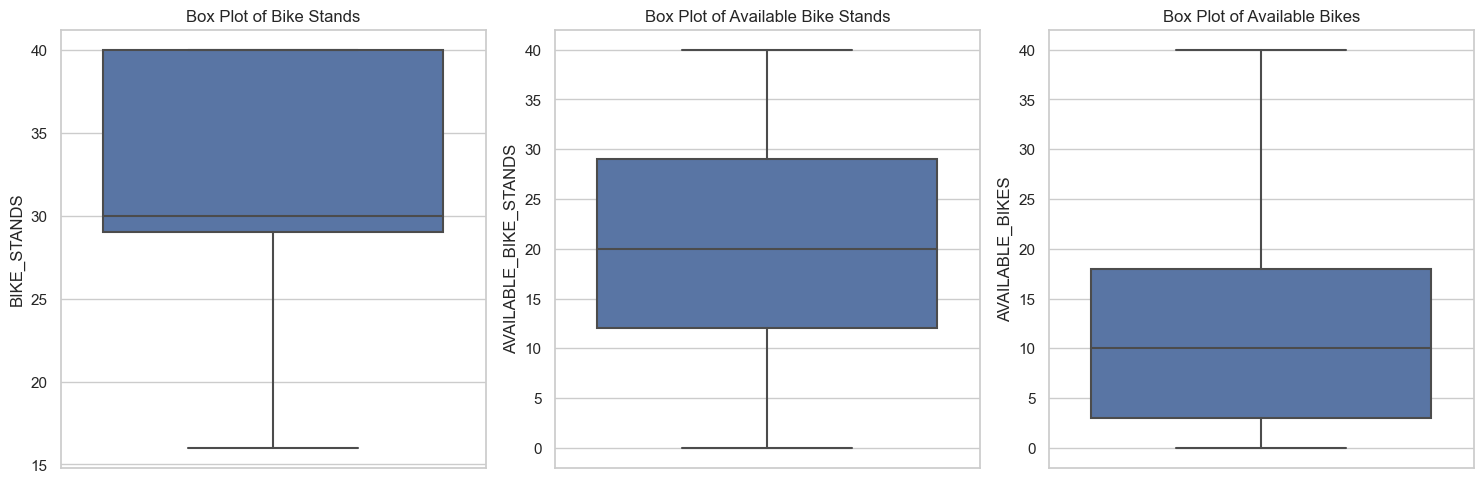

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=bikes_data_aug_2022_dublin['BIKE_STANDS'])
plt.title('Box Plot of Bike Stands')

plt.subplot(1, 3, 2)
sns.boxplot(y=bikes_data_aug_2022_dublin['AVAILABLE_BIKE_STANDS'])
plt.title('Box Plot of Available Bike Stands')

plt.subplot(1, 3, 3)
sns.boxplot(y=bikes_data_aug_2022_dublin['AVAILABLE_BIKES'])
plt.title('Box Plot of Available Bikes')

plt.tight_layout()
plt.show()

Bike Stands:

The median and quartiles appear to be tightly clustered, suggesting a relatively uniform distribution of the total number of bike stands across stations. This indicates that most stations have a similar capacity in terms of bike stands.
There seem to be no extreme outliers, which implies that there aren't any stations that are significantly larger or smaller than the average station in terms of total bike stands.

Available Bike Stands:
The median and quartiles for available bike stands appear to be closely spaced, indicating that the majority of stations have a similar number of free stands most of the time. This uniformity suggests a balanced distribution of bike stand utilization across different stations.

Available Bikes:
The median and quartiles in the box plot for available bikes also seem to be closely gathered. This suggests that the availability of bikes at the stations is generally consistent, with most stations having a similar number of bikes available for use.



In [37]:
outlier_data = detect_outliers(bikes_data_aug_2022_dublin, ['BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES'])
outlier_data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,Outlier_Column


In [38]:
outlier_data.shape

(0, 12)

The statistical analysis using the IQR method reveals that there are 0 rows in the dataset considered as outliers.

## Dropping irrelevant columns and renaming

In [39]:
bikes_data_aug_2022_dublin["STATUS"].unique()

array(['OPEN'], dtype=object)

The only value present within the STATUS columns is Open, meaning that all stations are open, however this is not useful for the analysis so we can drop this column.  

The Machine Learning analysis will be performed on the TIME column, so LAST UPDATED column will be removed as well as it is not needed for the analysis. 

In [40]:
bikes_data_aug_2022_dublin = bikes_data_aug_2022_dublin.drop(['STATUS', 'LAST UPDATED'], axis = 1)
bikes_data_aug_2022_dublin

,STATION ID,TIME,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ADDRESS,LATITUDE,LONGITUDE
0,1,2022-08-01 00:00:02,CLARENDON ROW,31,12,19,Clarendon Row,53.3409,-6.26250
1,2,2022-08-01 00:00:02,BLESSINGTON STREET,20,5,14,Blessington Street,53.3568,-6.26814
2,3,2022-08-01 00:00:02,BOLTON STREET,20,8,12,Bolton Street,53.3512,-6.26986
3,4,2022-08-01 00:00:02,GREEK STREET,20,1,17,Greek Street,53.3469,-6.27298
4,5,2022-08-01 00:00:02,CHARLEMONT PLACE,40,19,21,Charlemont Street,53.3307,-6.26018
...,...,...,...,...,...,...,...,...,...
168139,113,2022-08-31 23:30:02,MERRION SQUARE SOUTH,40,40,0,Merrion Square South,53.3386,-6.24861
168140,114,2022-08-31 23:30:02,WILTON TERRACE (PARK),40,39,1,Wilton Terrace (Park),53.3337,-6.24834
168141,115,2022-08-31 23:30:02,KILLARNEY STREET,30,0,30,Killarney Street,53.3548,-6.24758
168142,116,2022-08-31 23:30:02,BROADSTONE,30,18,12,Broadstone,53.3547,-6.27231


For consistency and to match the data for Madrid, all column names will be converted to lowercase.

In [42]:
# Converting all column names to lowercase
bikes_data_aug_2022_dublin.columns = [col.lower() for col in bikes_data_aug_2022_dublin.columns]

bikes_data_aug_2022_dublin.head()

,station id,time,name,bike_stands,available_bike_stands,available_bikes,address,latitude,longitude
0,1,2022-08-01 00:00:02,CLARENDON ROW,31,12,19,Clarendon Row,53.3409,-6.26250
1,2,2022-08-01 00:00:02,BLESSINGTON STREET,20,5,14,Blessington Street,53.3568,-6.26814
2,3,2022-08-01 00:00:02,BOLTON STREET,20,8,12,Bolton Street,53.3512,-6.26986
3,4,2022-08-01 00:00:02,GREEK STREET,20,1,17,Greek Street,53.3469,-6.27298
4,5,2022-08-01 00:00:02,CHARLEMONT PLACE,40,19,21,Charlemont Street,53.3307,-6.26018


Converting the TIME column to datetime as this will be used in the time series analysis

In [43]:
bikes_data_aug_2022_dublin['time'] = pd.to_datetime(bikes_data_aug_2022_dublin['time'])

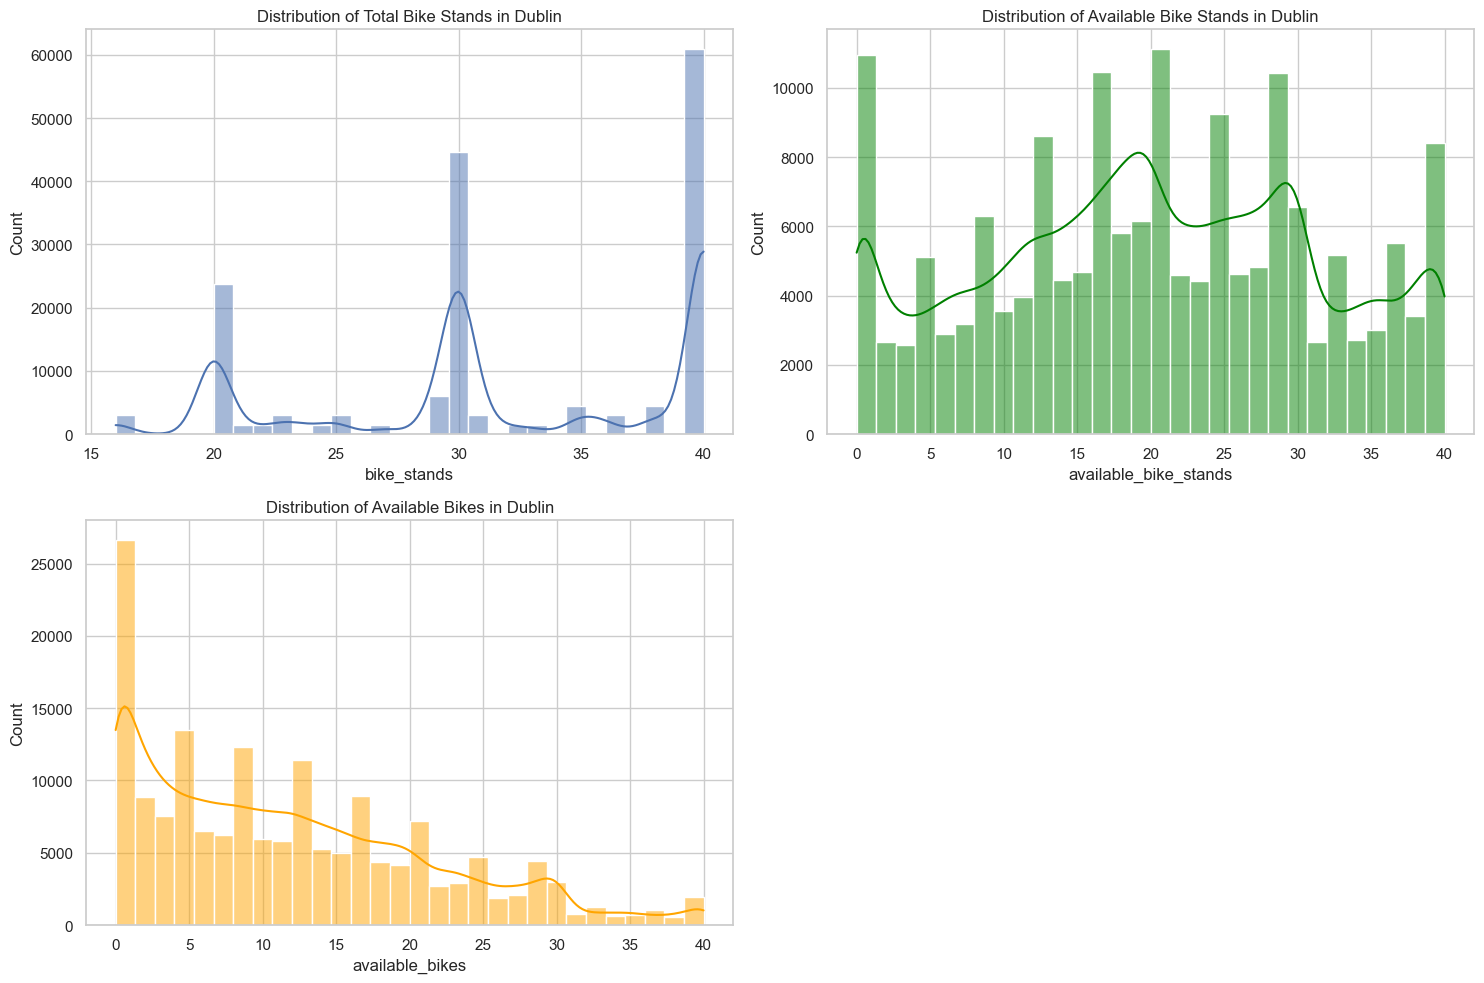

In [44]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Bike Stands
plt.subplot(2, 2, 1)
sns.histplot(bikes_data_aug_2022_dublin['bike_stands'], kde=True, bins=30)
plt.title('Distribution of Total Bike Stands in Dublin')

# Available Bike Stands
plt.subplot(2, 2, 2)
sns.histplot(bikes_data_aug_2022_dublin['available_bike_stands'], kde=True, bins=30, color='green')
plt.title('Distribution of Available Bike Stands in Dublin')

# Available Bikes
plt.subplot(2, 2, 3)
sns.histplot(bikes_data_aug_2022_dublin['available_bikes'], kde=True, bins=30, color='orange')
plt.title('Distribution of Available Bikes in Dublin')

plt.tight_layout()
plt.show()

Distribution of Total Bike Stands:

The distribution of total bike stands in Dublin shows a range of station sizes.
There appears to be a common size for bike stations, as indicated by the peak in the histogram. This suggests a standardization in the number of bike stands at many stations.
The spread of the histogram also indicates that there are stations with significantly more or fewer bike stands than the average, catering to areas with different demands.

Distribution of Available Bike Stands:
The distribution of available bike stands is somewhat varied.
A significant number of stations frequently have a high number of available stands, as indicated by the peak towards the higher end of the scale. This could suggest either low usage at these stations or efficient bike redistribution by the service provider.
However, there are also stations where fewer stands are available, which might be in areas with higher demand or lower total capacity.

Distribution of Available Bikes:
The distribution of available bikes shows a varied range, similar to the distribution of available bike stands.
There are peaks at both lower and higher numbers of available bikes. This suggests that while some stations often have many bikes available, others frequently have fewer bikes ready for use.
Stations with consistently fewer available bikes might be experiencing high usage or could be points where bikes are frequently rented from but not returned to as often.

Creating a new dataset to simplify it, as creating the interactive visualization with the whole dataset resulted in a very long loading time and interruption of the notebook. The only data needed for the geographic visualization is the Name of the Station, the Latitude and Longitude. 

In [45]:
data_for_station_viz = bikes_data_aug_2022_dublin[['name', 'latitude', 'longitude']].drop_duplicates()

data_for_station_viz

,name,latitude,longitude
0,CLARENDON ROW,53.3409,-6.26250
1,BLESSINGTON STREET,53.3568,-6.26814
2,BOLTON STREET,53.3512,-6.26986
3,GREEK STREET,53.3469,-6.27298
4,CHARLEMONT PLACE,53.3307,-6.26018
...,...,...,...
108,MERRION SQUARE SOUTH,53.3386,-6.24861
109,WILTON TERRACE (PARK),53.3337,-6.24834
110,KILLARNEY STREET,53.3548,-6.24758
111,BROADSTONE,53.3547,-6.27231


In [46]:
dublin_map = folium.Map(location=[53.3498, -6.2603], zoom_start=13)

for index, row in data_for_station_viz.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']  
    ).add_to(dublin_map)

dublin_map


In [47]:
bikes_data_aug_2022_dublin['name'].unique()

array(['CLARENDON ROW', 'BLESSINGTON STREET', 'BOLTON STREET',
       'GREEK STREET', 'CHARLEMONT PLACE', 'CHRISTCHURCH PLACE',
       'HIGH STREET', 'CUSTOM HOUSE QUAY', 'EXCHEQUER STREET',
       'DAME STREET', 'EARLSFORT TERRACE', 'ECCLES STREET',
       'FITZWILLIAM SQUARE WEST', 'FOWNES STREET UPPER',
       'HARDWICKE STREET', 'GEORGES QUAY', 'GOLDEN LANE',
       'GRANTHAM STREET', 'HERBERT PLACE', 'JAMES STREET EAST',
       'LEINSTER STREET SOUTH', 'TOWNSEND STREET', 'CUSTOM HOUSE',
       'CATHAL BRUGHA STREET', 'MERRION SQUARE EAST',
       'MERRION SQUARE WEST', 'MOLESWORTH STREET', 'MOUNTJOY SQUARE WEST',
       'ORMOND QUAY UPPER', 'PARNELL SQUARE NORTH', 'PARNELL STREET',
       'PEARSE STREET', "PRINCES STREET / O'CONNELL STREET",
       'PORTOBELLO HARBOUR', "ST. STEPHEN'S GREEN EAST",
       "ST. STEPHEN'S GREEN SOUTH", 'TALBOT STREET', 'WILTON TERRACE',
       'JERVIS STREET', 'HARCOURT TERRACE', 'SMITHFIELD NORTH',
       'PORTOBELLO ROAD', 'UPPER SHERRARD STREET', 

The initial goal was to understand the patterns of bicycle usage at different stations. Fundamental statistical methods were used to analyze the activity level. The standard deviation of the capacity ratio (available bikes/number of stands) was calculated. My hypothesis was that higher fluctuations in the ratio could indicate more dynamic activity. The following shows the top 5 stations with highest variation. 


In [48]:
bikes_data_aug_2022_dublin['capacity_ratio'] = bikes_data_aug_2022_dublin['available_bikes'] / bikes_data_aug_2022_dublin['bike_stands']

station_volatility_all_days = bikes_data_aug_2022_dublin.groupby('name')['capacity_ratio'].std().reset_index()

station_volatility_sorted_all_days = station_volatility_all_days.sort_values(by='capacity_ratio', ascending=False)

    
top_5_highest_volatility_all_days = station_volatility_sorted_all_days.head(5)
bottom_5_lowest_volatility_all_days = station_volatility_sorted_all_days.tail(5)

top_5_highest_volatility_all_days, bottom_5_lowest_volatility_all_days


(                                 name  capacity_ratio
 91                    PORTOBELLO ROAD        0.369228
 90                 PORTOBELLO HARBOUR        0.363015
 54             HEUSTON BRIDGE (SOUTH)        0.359638
 82  NORTH CIRCULAR ROAD (O'CONNELL'S)        0.353283
 63                   KILLARNEY STREET        0.340521,
                            name  capacity_ratio
 107                 WESTERN WAY        0.151415
 29      FITZWILLIAM SQUARE EAST        0.144594
 39   GRANGEGORMAN LOWER (NORTH)        0.144175
 16            CONVENTION CENTRE        0.114445
 40   GRANGEGORMAN LOWER (SOUTH)        0.106152)

In [49]:
station_volatility_sorted_all_days

,name,capacity_ratio
91,PORTOBELLO ROAD,0.369228
90,PORTOBELLO HARBOUR,0.363015
54,HEUSTON BRIDGE (SOUTH),0.359638
82,NORTH CIRCULAR ROAD (O'CONNELL'S),0.353283
63,KILLARNEY STREET,0.340521
...,...,...
107,WESTERN WAY,0.151415
29,FITZWILLIAM SQUARE EAST,0.144594
39,GRANGEGORMAN LOWER (NORTH),0.144175
16,CONVENTION CENTRE,0.114445


In [50]:
def get_gradient_color(value, min_val, max_val):
    """
    Maps a value to a color ranging from red (low) to green (high), with yellow in the middle.
    """
    # Normalize value between 0 and 1
    normalized = (value - min_val) / (max_val - min_val)
    
    # Define red, yellow, and green in RGB
    red, yellow, green = (1, 0, 0), (1, 1, 0), (0, 1, 0)
    
    if normalized < 0.5:
        # Blend between red and yellow for the lower half
        return [red[i] + (yellow[i] - red[i]) * (normalized * 2) for i in range(3)]
    else:
        # Blend between yellow and green for the upper half
        return [yellow[i] + (green[i] - yellow[i]) * ((normalized - 0.5) * 2) for i in range(3)]

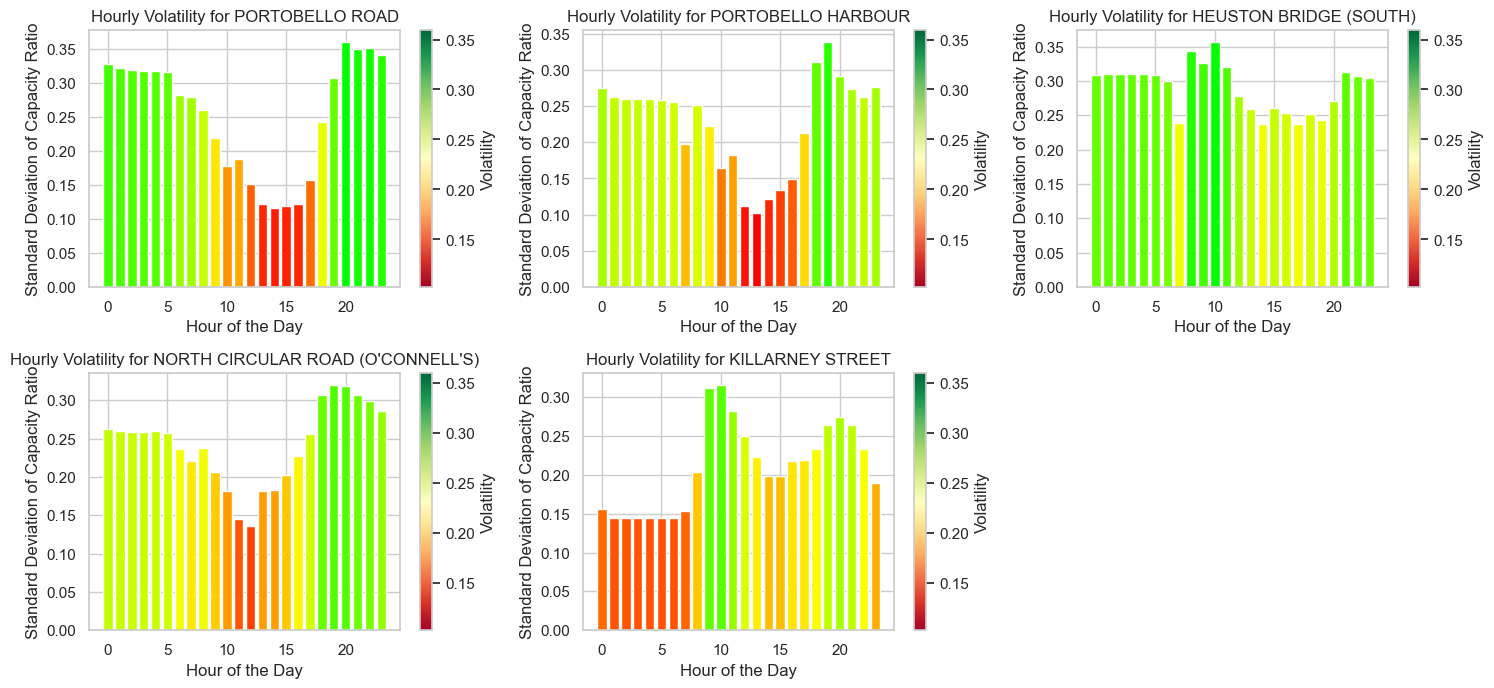

In [51]:
top_5_stations_names_all_days = top_5_highest_volatility_all_days['name'].tolist()

hourly_volatility_top_5_all_days = bikes_data_aug_2022_dublin[bikes_data_aug_2022_dublin['name'].isin(top_5_stations_names_all_days)]
hourly_volatility_top_5_all_days['hour'] = hourly_volatility_top_5_all_days['time'].dt.hour
hourly_volatility_top_5_stations_all_days = hourly_volatility_top_5_all_days.groupby(['name', 'hour'])['capacity_ratio'].std().reset_index()


min_volatility_top_5_all_days = hourly_volatility_top_5_stations_all_days['capacity_ratio'].min()
max_volatility_top_5_all_days = hourly_volatility_top_5_stations_all_days['capacity_ratio'].max()



num_plots = len(top_5_stations_names_all_days)
grid_size = int(np.ceil(np.sqrt(num_plots))) 

plt.figure(figsize=(15, 10)) 

for i, station in enumerate(top_5_stations_names_all_days, 1):
    ax = plt.subplot(grid_size, grid_size, i) 
    station_data = hourly_volatility_top_5_stations_all_days[hourly_volatility_top_5_stations_all_days['name'] == station]
    colors = [get_gradient_color(val, min_volatility_top_5_all_days, max_volatility_top_5_all_days) for val in station_data['capacity_ratio']]
    plt.bar(station_data['hour'], station_data['capacity_ratio'], color=colors)
    plt.title(f'Hourly Volatility for {station}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Standard Deviation of Capacity Ratio')
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(min_volatility_top_5_all_days, max_volatility_top_5_all_days), cmap=plt.cm.RdYlGn), ax=ax, orientation='vertical', label='Volatility')

plt.tight_layout() 
plt.show()

Portobello Road, Portobello Harbour follow the same pattern - there are periods of minimal acitivity and high capacity ratio from midnight to 6AM. In the morning and around lunch the capcity ratio  declines from around 10 am to 4pm. This suggests a heavy use by commuters during rush hours which result in decrease in available bikes. This is followed by an increase in the capacity after 7pm. 

In contrast, Killarney Street presents an opposite pattern. Its capacity ratios are decreasing during the early mornign hours (12 AM to 7 AM), implying that the station is being cleared out. Then, in the daytime (9 AM to 2 PM), it experiences peak ratios, indicating it is a popular drop-off point. Its proximity to business areas likely contributes to this pattern.

In [52]:
bikes_data_aug_2022_dublin.head()

,station id,time,name,bike_stands,available_bike_stands,available_bikes,address,latitude,longitude,capacity_ratio
0,1,2022-08-01 00:00:02,CLARENDON ROW,31,12,19,Clarendon Row,53.3409,-6.26250,0.612903
1,2,2022-08-01 00:00:02,BLESSINGTON STREET,20,5,14,Blessington Street,53.3568,-6.26814,0.700000
2,3,2022-08-01 00:00:02,BOLTON STREET,20,8,12,Bolton Street,53.3512,-6.26986,0.600000
3,4,2022-08-01 00:00:02,GREEK STREET,20,1,17,Greek Street,53.3469,-6.27298,0.850000
4,5,2022-08-01 00:00:02,CHARLEMONT PLACE,40,19,21,Charlemont Street,53.3307,-6.26018,0.525000


A calculation will be performed in order to get the estimation of number of trips per station. The calculation will assume that a trip occurs whenever there's a decrease in the number of available bikes (indicating a bike has been taken out).

In [54]:
# Getting a list of unique station IDs
unique_station = bikes_data_aug_2022_dublin['name'].unique()

# Creating an empty dataframe to store the results
bike_usage = pd.DataFrame()

for name in unique_station:
    filtered = bikes_data_aug_2022_dublin[bikes_data_aug_2022_dublin['name'] == name]

    filtered = filtered.sort_values(by=['time'], ascending=True)
    
    filtered["trips"] = filtered["available_bikes"].diff()

    bike_usage = pd.concat([bike_usage, filtered[filtered['trips'] > 0]])

bike_usage.head()


,station id,time,name,bike_stands,available_bike_stands,available_bikes,address,latitude,longitude,capacity_ratio,trips
1582,1,2022-08-01 07:00:02,CLARENDON ROW,31,10,21,Clarendon Row,53.3409,-6.2625,0.677419,2.0
1808,1,2022-08-01 08:00:02,CLARENDON ROW,31,9,22,Clarendon Row,53.3409,-6.2625,0.709677,1.0
2260,1,2022-08-01 10:00:02,CLARENDON ROW,31,9,22,Clarendon Row,53.3409,-6.2625,0.709677,2.0
2373,1,2022-08-01 10:30:02,CLARENDON ROW,31,8,23,Clarendon Row,53.3409,-6.2625,0.741935,1.0
2486,1,2022-08-01 11:00:02,CLARENDON ROW,31,5,26,Clarendon Row,53.3409,-6.2625,0.838710,3.0


In [55]:
bike_usage['trips'] = bike_usage['trips'].astype(int)

In [57]:
station_trips = bike_usage.pivot_table(index='name', values='trips', aggfunc='sum')

# Sorting the results to find the stations with the most trips
station_trips_sorted = station_trips.sort_values(by='trips', ascending=False)

In [58]:
station_trips_sorted.head()

,trips
name,
PRINCES STREET / O'CONNELL STREET,2108
GRAND CANAL DOCK,1772
EXCHEQUER STREET,1718
CHARLEMONT PLACE,1702
SIR PATRICK DUN'S,1702


In [59]:
station_trips_sorted.tail()

,trips
name,
FITZWILLIAM SQUARE EAST,405
MERRION SQUARE SOUTH,377
GRANGEGORMAN LOWER (NORTH),301
HEUSTON STATION (CAR PARK),271
GRANGEGORMAN LOWER (CENTRAL),199


In [60]:
top_5_stations_pivot = station_trips_sorted.nlargest(5, 'trips')

In [61]:
bottom_5_stations_pivot = station_trips_sorted.nsmallest(5, 'trips')

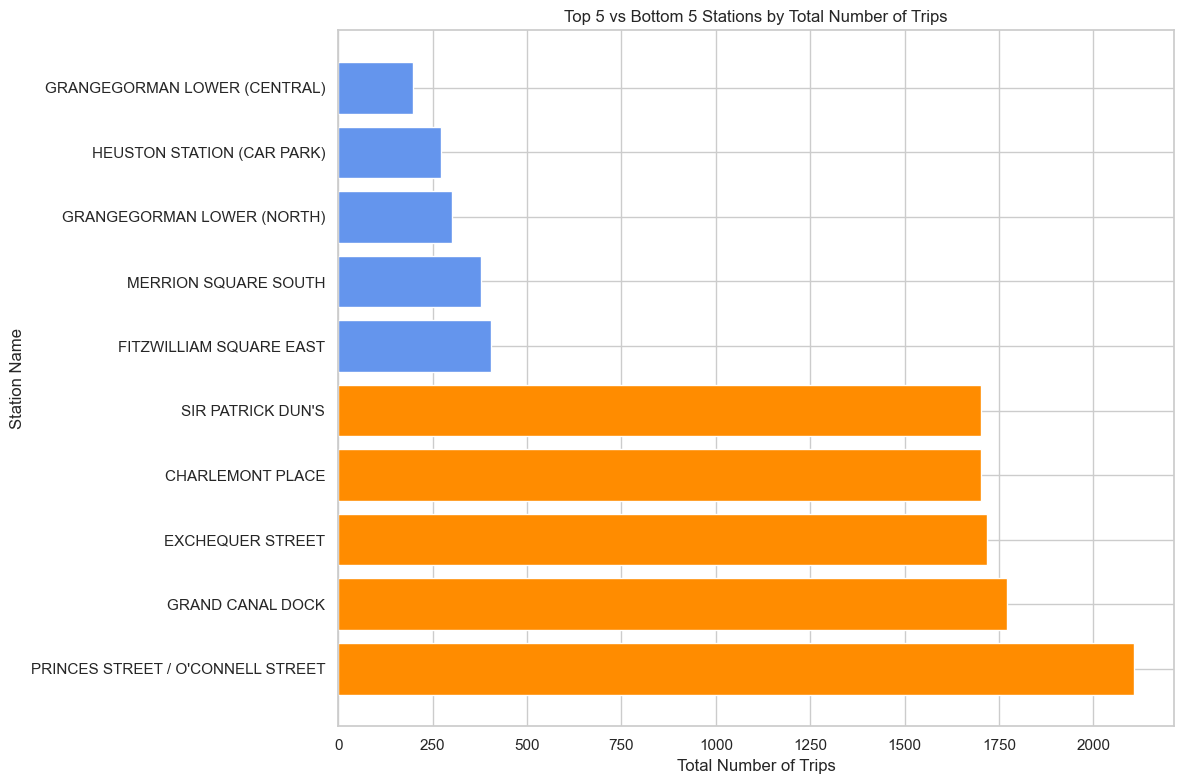

In [62]:
top_5_stations = station_trips_sorted.head(5)
bottom_5_stations = station_trips_sorted.tail(5)

combined_top_bottom_stations = pd.concat([top_5_stations, bottom_5_stations])

combined_top_bottom_stations_reset = combined_top_bottom_stations.reset_index()

combined_top_bottom_stations_reset['station_type'] = ['Top' for _ in range(5)] + ['Bottom' for _ in range(5)]

plt.figure(figsize=(12, 8))

names = combined_top_bottom_stations_reset['name']
trips = combined_top_bottom_stations_reset['trips']
types = combined_top_bottom_stations_reset['station_type']

colors = ['#FF8C00' if t == 'Top' else '#6495ED' for t in types]  

plt.barh(y=names, width=trips, color=colors)

plt.title('Top 5 vs Bottom 5 Stations by Total Number of Trips')
plt.xlabel('Total Number of Trips')
plt.ylabel('Station Name')
plt.tight_layout()
plt.show()



Stations with the highest number of trips are all located in the city center, suggesting a convergence of convenience, urban activity, and transportation efficiency, making these areas focal points for commuting, tourism, and economic activity.

For High Activity Stations: Prioritizing these central hubs for consistent maintenance and rebalancing is critical to keeping the network running smoothly. Busy stations, such as O'Connell Street and Grand Canal Dock, are essential to keeping users happy by ensuring there are always enough bikes and docking points to meet the high demand.

For Low Activity Stations: Stations such as Grangegorman Lower and Heuston Station, necessitate a distinct approach. It's important to identify the root causes of their limited use. Are they poorly accessible, lacking in nearby attractions, not visible enough, or perhaps suffering from a perception of low reliability? Employing targeted advertising, engaging with the community, and conducting surveys can help reveal and address these issues.

In [63]:
bikes_data_aug_2022_dublin.to_csv('dublin_bike_data_for_ML.csv', index = False)

## Madrid Bike Data for August 2022

In [417]:
zip_path = "C:/Users/mariy/CA2/202208-json.zip"
extract_dir = "C:/Users/mariy/CA2/extracted_json"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

json_file_path = os.path.join(extract_dir, '202208.json')

def parse_json_line_by_line(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                json_object = json.loads(line)
                data.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error parsing line: {e}")
    return data

line_by_line_data = parse_json_line_by_line(json_file_path)

flattened_stations = pd.DataFrame()
for index, row in pd.DataFrame(line_by_line_data).iterrows():
    stations_df = pd.DataFrame(row['stations'])
    stations_df['_id'] = row['_id']
    flattened_stations = flattened_stations.append(stations_df, ignore_index=True)

print(flattened_stations.head())


   activate                name  reservations_count  light  total_bases  \
0         1    Puerta del Sol A                   0      0           30   
1         1    Puerta del Sol B                   0      0           30   
2         1         Miguel Moya                   0      0           24   
3         1  Plaza Conde Suchil                   0      2           18   
4         1            Malasaña                   0      0           24   

   free_bases number           longitude  no_available  \
0          25     1a          -3.7018341             0   
1          27     1b  -3.701602938060457             0   
2          24      2          -3.7058415             0   
3           6      3          -3.7069171             0   
4          18      4          -3.7025875             0   

                                    address           latitude  dock_bikes  \
0                       Puerta del Sol nº 1         40.4172137           3   
1                       Puerta del Sol nº 1 

In [418]:
flattened_stations.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,_id
0,1,Puerta del Sol A,0,0,30,25,1a,-3.7018341,0,Puerta del Sol nº 1,40.4172137,3,1,2022-08-01T00:23:31.204139
1,1,Puerta del Sol B,0,0,30,27,1b,-3.701602938060457,0,Puerta del Sol nº 1,40.41731271011562,3,2,2022-08-01T00:23:31.204139
2,1,Miguel Moya,0,0,24,24,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,0,3,2022-08-01T00:23:31.204139
3,1,Plaza Conde Suchil,0,2,18,6,3,-3.7069171,0,Plaza del Conde del Valle de Súchil nº 3,40.4302937,11,4,2022-08-01T00:23:31.204139
4,1,Malasaña,0,0,24,18,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,4,5,2022-08-01T00:23:31.204139


Saving the file to csv format and loading it again directly using read_csv().

In [66]:
flattened_stations.to_csv('bike_data_aug_2022_mdrid.csv', index = False)

In [65]:
bike_data_aug_2022_madrid = pd.read_csv('bike_data_aug_2022_mdrid.csv')
bike_data_aug_2022_madrid.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,_id
0,1,Puerta del Sol A,0,0,30,25,1a,-3.701834,0,Puerta del Sol nº 1,40.417214,3,1,2022-08-01T00:23:31.204139
1,1,Puerta del Sol B,0,0,30,27,1b,-3.701603,0,Puerta del Sol nº 1,40.417313,3,2,2022-08-01T00:23:31.204139
2,1,Miguel Moya,0,0,24,24,2,-3.705842,0,Calle Miguel Moya nº 1,40.420589,0,3,2022-08-01T00:23:31.204139
3,1,Plaza Conde Suchil,0,2,18,6,3,-3.706917,0,Plaza del Conde del Valle de Súchil nº 3,40.430294,11,4,2022-08-01T00:23:31.204139
4,1,Malasaña,0,0,24,18,4,-3.702587,0,Calle Manuela Malasaña nº 5,40.428552,4,5,2022-08-01T00:23:31.204139


In [67]:
bike_data_aug_2022_madrid.shape

(196152, 14)

In [68]:
bike_data_madrid_size = bike_data_aug_2022_madrid.size
print(f'Total number of elements in the DataFrame: {bike_data_madrid_size}.')

Total number of elements in the DataFrame: 2746128.


In [69]:
bike_data_aug_2022_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   activate            196152 non-null  int64  
 1   name                196152 non-null  object 
 2   reservations_count  196152 non-null  int64  
 3   light               196152 non-null  int64  
 4   total_bases         196152 non-null  int64  
 5   free_bases          196152 non-null  int64  
 6   number              196152 non-null  object 
 7   longitude           196152 non-null  float64
 8   no_available        196152 non-null  int64  
 9   address             196152 non-null  object 
 10  latitude            196152 non-null  float64
 11  dock_bikes          196152 non-null  int64  
 12  id                  196152 non-null  int64  
 13  _id                 196152 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 21.0+ MB


In [70]:
bike_data_aug_2022_madrid.describe()

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,id
count,196152.0,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000
mean,1.0,0.052342,1.294562,23.920455,11.942463,-3.692086,0.037282,40.425842,9.868597,136.829545
std,0.0,0.246366,0.931606,1.874201,5.739141,0.018231,0.189453,0.018024,5.582153,77.329269
min,1.0,0.000000,0.000000,12.000000,0.000000,-3.729970,0.000000,40.388950,0.000000,1.000000
25%,1.0,0.000000,0.000000,24.000000,8.000000,-3.704347,0.000000,40.413169,6.000000,71.750000
50%,1.0,0.000000,2.000000,24.000000,12.000000,-3.693653,0.000000,40.425145,10.000000,137.500000
75%,1.0,0.000000,2.000000,24.000000,16.000000,-3.678812,0.000000,40.437176,14.000000,203.250000
max,1.0,4.000000,3.000000,30.000000,30.000000,-3.634587,1.000000,40.481086,30.000000,270.000000


In [71]:
bike_data_aug_2022_madrid['total_bases'].unique()

array([30, 24, 18, 27, 21, 22, 20, 12], dtype=int64)

In [72]:
total_bases_frequency = bike_data_aug_2022_madrid['total_bases'].value_counts().sort_index()
total_bases_frequency

12       743
18      5944
20       743
21     11145
22       743
24    157516
27     16346
30      2972
Name: total_bases, dtype: int64

In [73]:
print(f"Number of duplicate rows in the bike dataset for Madrid is {count_duplicated_rows(bike_data_aug_2022_madrid)}.")

Number of duplicate rows in the bike dataset for Madrid is 0.


In [74]:
count_nan_values(bike_data_aug_2022_madrid)

activate              0
name                  0
reservations_count    0
light                 0
total_bases           0
free_bases            0
number                0
longitude             0
no_available          0
address               0
latitude              0
dock_bikes            0
id                    0
_id                   0
dtype: int64

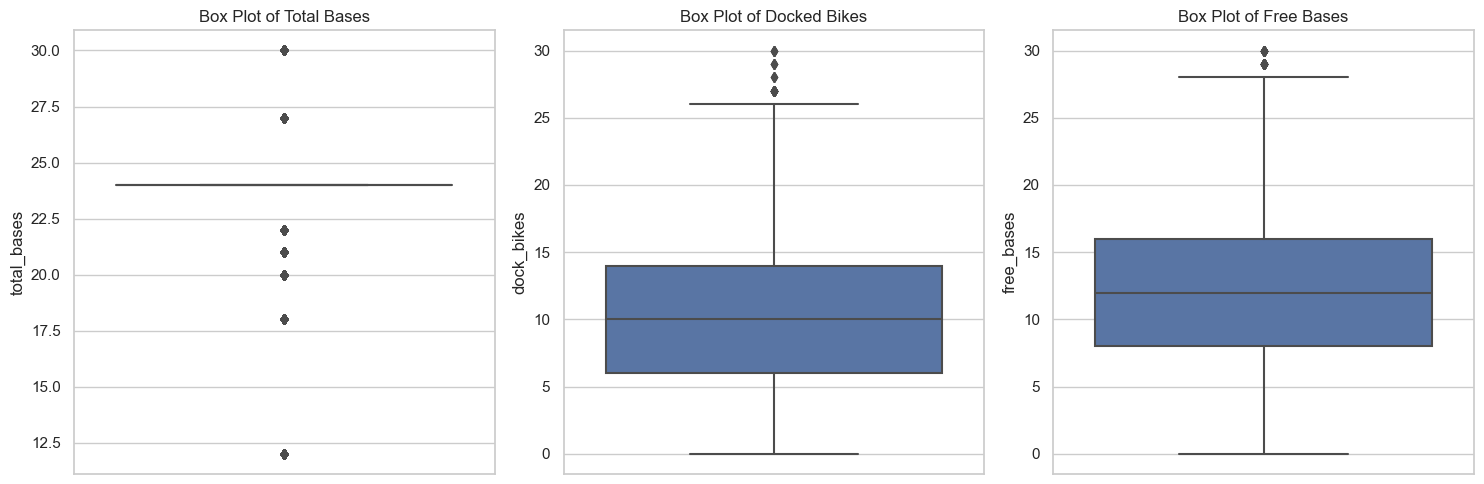

In [75]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

# total_bases
plt.subplot(1, 3, 1)
sns.boxplot(y=bike_data_aug_2022_madrid['total_bases'])
plt.title('Box Plot of Total Bases')

# dock_bikes
plt.subplot(1, 3, 2)
sns.boxplot(y=bike_data_aug_2022_madrid['dock_bikes'])
plt.title('Box Plot of Docked Bikes')

# free_bases
plt.subplot(1, 3, 3)
sns.boxplot(y=bike_data_aug_2022_madrid['free_bases'])
plt.title('Box Plot of Free Bases')

plt.tight_layout()
plt.show()


Total Bases:  
Mean: Approximately 23.92, suggesting that on average, stations have around 24 bases.  
Median (50th percentile): Exactly 24, aligning with the mean, indicating a consistent station size across the dataset.  
IQR (25th to 75th percentile): Most stations have between 24 and 24 bases, showing very little variability in station size.  
Range: Stations vary from 12 to 30 bases, but the vast majority seem to be around 24.  
Docked Bikes:  
Mean: Approximately 9.87, suggesting that there are typically around 10 bikes docked at a station.  
Median (50th percentile): 10, closely aligning with the mean, indicating a balanced distribution of docked bikes across stations.  
IQR (25th to 75th percentile): Stations typically have between 6 and 14 docked bikes, showing moderate variability in bike occupancy.  
Range: Bikes vary from being completely absent (0) to a full capacity of 30 at some stations.  
Free Bases:  
Mean: Approximately 11.94, indicating that there are typically around 12 free bases per station.  
Median (50th percentile): 12, closely matching the mean, suggesting a general availability of around half the station's capacity.  
IQR (25th to 75th percentile): Most stations have between 8 and 16 free bases, indicating some variability but generally a good number of free spaces.  
Range: In some cases, stations are completely full (0 free bases) or completely empty (up to 30 free bases).  

The similar median values for 'dock_bikes' and 'free_bases' suggest a relatively balanced system where, on average, half the bases at a station are occupied by bikes. However, the range and IQR indicate that this balance can vary significantly, with some stations frequently full or empty.

In [76]:
outlier_data_madrid = detect_outliers(bike_data_aug_2022_madrid, ['total_bases','free_bases', 'dock_bikes'])
outlier_data_madrid.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,_id,Outlier_Column
0,1,Puerta del Sol A,0,0,30,25,1a,-3.701834,0,Puerta del Sol nº 1,40.417214,3,1,2022-08-01T00:23:31.204139,total_bases
1,1,Puerta del Sol B,0,0,30,27,1b,-3.701603,0,Puerta del Sol nº 1,40.417313,3,2,2022-08-01T00:23:31.204139,total_bases
3,1,Plaza Conde Suchil,0,2,18,6,3,-3.706917,0,Plaza del Conde del Valle de Súchil nº 3,40.430294,11,4,2022-08-01T00:23:31.204139,total_bases
5,1,Fuencarral,0,0,27,22,5,-3.702050,0,Calle Fuencarral nº 108,40.428520,4,6,2022-08-01T00:23:31.204139,total_bases
7,1,Hortaleza,0,2,21,10,7,-3.697771,0,Calle Hortaleza nº 75,40.425191,9,8,2022-08-01T00:23:31.204139,total_bases


In [77]:
outlier_data_madrid.shape

(38745, 15)

As outliers are not due to data erros but because of the dynamics within the bike usage - peak times, popular stations, etc. outliers will be kept as the analysis is focused on the bike usage overall and not only typical cases.

The outliers in the data set are not data entry errors but they represent real-world scenarios and genuine variations in bike usage. This includes fluctuations due to external factors like weather changes, special events, or rush hours. Removing these outliers might have eliminated important information that captures the true dynamics of bike availability.

Time series data, inherently includes variations over time that are crucial for understanding patterns. What might seem like outliers could be valuable data points that reflect periodic trends, seasonal effects, or other cyclical factors. As a time series model will be applied, outliers will not be removed from the dataset. 

In [78]:
num_outliers = len(outlier_data_madrid)
total_data_points = len(bike_data_aug_2022_madrid)
percentage_outliers = (num_outliers / total_data_points) * 100

percentage_outliers

19.752538847424447

## Dropping irrelevant columns

In [79]:
bike_data_aug_2022_madrid['activate'].unique()

array([1], dtype=int64)

For the 'activate' column, we only have the value 1 which means that the the station is active. 'number' and 'id' will also be removed as they are not relevant for the analysis

In [80]:
bike_data_aug_2022_madrid = bike_data_aug_2022_madrid.drop(['activate', 'number', 'id'], axis = 1)
bike_data_aug_2022_madrid

,name,reservations_count,light,total_bases,free_bases,longitude,no_available,address,latitude,dock_bikes,_id
0,Puerta del Sol A,0,0,30,25,-3.701834,0,Puerta del Sol nº 1,40.417214,3,2022-08-01T00:23:31.204139
1,Puerta del Sol B,0,0,30,27,-3.701603,0,Puerta del Sol nº 1,40.417313,3,2022-08-01T00:23:31.204139
2,Miguel Moya,0,0,24,24,-3.705842,0,Calle Miguel Moya nº 1,40.420589,0,2022-08-01T00:23:31.204139
3,Plaza Conde Suchil,0,2,18,6,-3.706917,0,Plaza del Conde del Valle de Súchil nº 3,40.430294,11,2022-08-01T00:23:31.204139
4,Malasaña,0,0,24,18,-3.702587,0,Calle Manuela Malasaña nº 5,40.428552,4,2022-08-01T00:23:31.204139
...,...,...,...,...,...,...,...,...,...,...,...
196147,INEF,0,0,24,18,-3.729970,0,Avenida Juan de Herrera frente a la calle Paul...,40.438960,5,2022-08-31T23:45:03.203752
196148,Ciudad Universitaria 1,0,0,24,18,-3.726990,0,Avenida de la Complutense (Metro Ciudad Univer...,40.443750,5,2022-08-31T23:45:03.203752
196149,Ciudad Universitaria 2,0,0,24,16,-3.726930,0,Avenida de la Complutense (Metro Ciudad Univer...,40.443420,7,2022-08-31T23:45:03.203752
196150,Facultad Biología,0,2,24,15,-3.727295,0,Calle José Antonio Novais frente al nº 12,40.448332,8,2022-08-31T23:45:03.203752


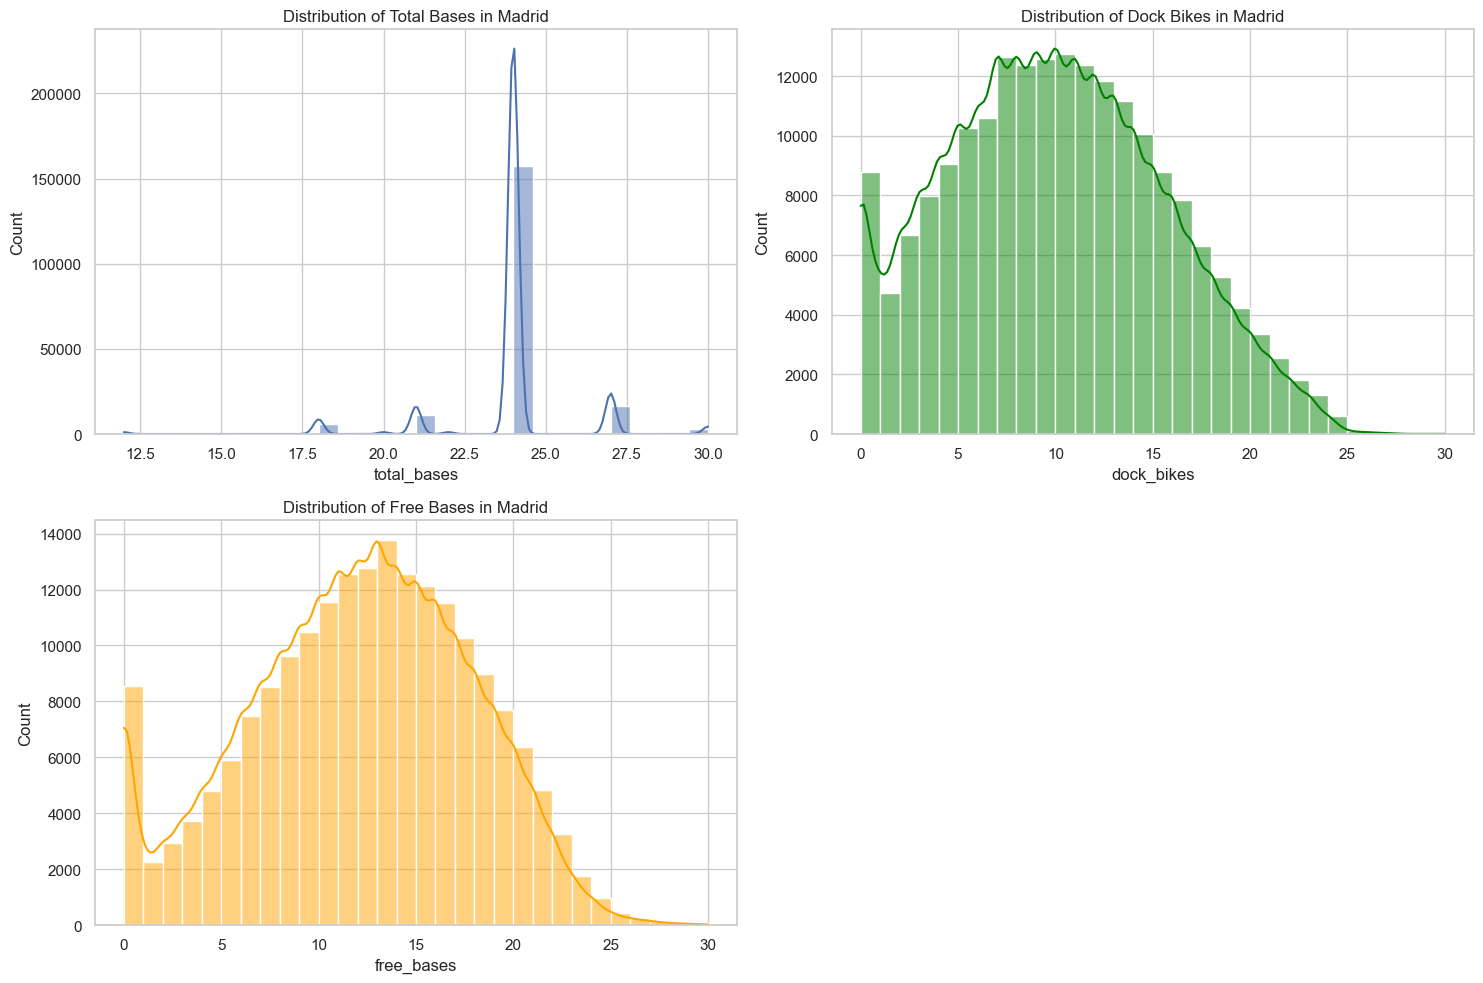

In [81]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

# Histogram for 'total_bases'
plt.subplot(2, 2, 1)
sns.histplot(bike_data_aug_2022_madrid['total_bases'], kde=True, bins=30)
plt.title('Distribution of Total Bases in Madrid')

# Histogram for 'dock_bikes'
plt.subplot(2, 2, 2)
sns.histplot(bike_data_aug_2022_madrid['dock_bikes'], kde=True, bins=30, color='green')
plt.title('Distribution of Dock Bikes in Madrid')

# Histogram for 'free_bases'
plt.subplot(2, 2, 3)
sns.histplot(bike_data_aug_2022_madrid['free_bases'], kde=True, bins=30, color='orange')
plt.title('Distribution of Free Bases in Madrid')

plt.tight_layout()
plt.show()


Distribution of Total Bases in Madrid:  
Concentration of Values: The histogram likely showed a sharp peak around 24 bases, suggesting most stations have a similar capacity. This indicates a standardized approach to station size across the city.  
Limited Variability: The lack of wide spread in the distribution suggests there's not much variability in the size of the stations. Most are designed to hold a similar number of bikes, which could be due to city planning regulations or a strategic approach to evenly distribute access across areas.  
Distribution of Dock Bikes in Madrid:  
Variability in Usage: The wider spread in the distribution of docked bikes indicates variable usage across different stations. Some stations might consistently have more bikes (peaks in the histogram), suggesting higher demand or lower turnover rates.  
Potential Hotspots: Any peaks in the histogram could indicate stations that are particularly popular or strategic locations where users frequently rent or return bikes. Conversely, areas with very few docked bikes might indicate lower demand or issues with supply.  
Operational Adjustments: Stations frequently near full or empty might need operational attention, like redistributing bikes during certain times of the day to balance the network.  
Distribution of Free Bases in Madrid:  
Station Availability: Similar to docked bikes, the spread in free base availability indicates variability in how full or empty stations are. A more evenly distributed histogram suggests that while some stations might often be full, others have plenty of available spaces.  
Capacity Challenges: Stations frequently full (with few or no free bases) might struggle to accommodate more returns, especially during peak hours, suggesting a need for capacity expansion or dynamic redistribution.  
Demand Patterns: Like with docked bikes, the distribution can hint at areas with high or low usage, informing both users and operators about likely availability.  
General Insights:  
System Balance: Comparing the histograms of docked bikes and free bases gives an overall sense of how well-balanced the system is. Ideally, there should be a good mix of available bikes and free docks across the network to serve ongoing demand effectively.  
Operational Efficiency: Identifying patterns in peak usage (either too many docked bikes or too few free bases) can help in making targeted decisions for bike redistribution, station maintenance, or even where to place new stations.  
User Experience: Understanding the distribution of bikes and docks can inform users about what to expect and help operators improve the overall user experience by ensuring there's always a bike or dock available when and where needed.  

In [82]:
data_for_station_viz_madrid = bike_data_aug_2022_madrid[['name', 'latitude', 'longitude']].drop_duplicates()

data_for_station_viz_madrid

,name,latitude,longitude
0,Puerta del Sol A,40.417214,-3.701834
1,Puerta del Sol B,40.417313,-3.701603
2,Miguel Moya,40.420589,-3.705842
3,Plaza Conde Suchil,40.430294,-3.706917
4,Malasaña,40.428552,-3.702587
...,...,...,...
259,INEF,40.438960,-3.729970
260,Ciudad Universitaria 1,40.443750,-3.726990
261,Ciudad Universitaria 2,40.443420,-3.726930
262,Facultad Biología,40.448332,-3.727295


In [83]:
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=13)

for index, row in data_for_station_viz_madrid.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']  
    ).add_to(madrid_map)


madrid_map


In [84]:
bike_data_aug_2022_madrid['_id'] = pd.to_datetime(bike_data_aug_2022_madrid['_id'])

In [85]:
bike_data_aug_2022_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   name                196152 non-null  object        
 1   reservations_count  196152 non-null  int64         
 2   light               196152 non-null  int64         
 3   total_bases         196152 non-null  int64         
 4   free_bases          196152 non-null  int64         
 5   longitude           196152 non-null  float64       
 6   no_available        196152 non-null  int64         
 7   address             196152 non-null  object        
 8   latitude            196152 non-null  float64       
 9   dock_bikes          196152 non-null  int64         
 10  _id                 196152 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 16.5+ MB


In [86]:
bike_data_aug_2022_madrid['capacity_ratio'] = bike_data_aug_2022_madrid['dock_bikes'] / bike_data_aug_2022_madrid['total_bases']

station_volatility_all_days_madrid = bike_data_aug_2022_madrid.groupby('name')['capacity_ratio'].std().reset_index()

station_volatility_sorted_all_days_madrid = station_volatility_all_days_madrid.sort_values(by='capacity_ratio', ascending=False)

top_5_highest_volatility_all_days_madrid = station_volatility_sorted_all_days_madrid.head(5)
bottom_5_lowest_volatility_all_days_madrid = station_volatility_sorted_all_days_madrid.tail(5)

top_5_highest_volatility_all_days_madrid, bottom_5_lowest_volatility_all_days_madrid

(                        name  capacity_ratio
 180  Plaza de Nelson Mandela        0.316916
 187       Plaza de la Cebada        0.314621
 193      Plaza de los Carros        0.309389
 121          Manuel Caldeiro        0.309148
 182   Plaza de San Francisco        0.293704,
                                       name  capacity_ratio
 197                                   Prim             0.0
 23                       Banco de España A             0.0
 47                               Chamartín             0.0
 95   General Perón con Poeta Joan Maragall             0.0
 94                         General Perón 1             0.0)

In [88]:
top_5_stations_names_all_days_madrid = top_5_highest_volatility_all_days_madrid['name'].tolist()
top_5_stations_names_all_days_madrid

['Plaza de Nelson Mandela',
 'Plaza de la Cebada',
 'Plaza de los Carros',
 'Manuel Caldeiro',
 'Plaza de San Francisco']

In [89]:
hourly_volatility_top_5_all_days_madrid = bike_data_aug_2022_madrid[bike_data_aug_2022_madrid['name'].isin(top_5_stations_names_all_days_madrid)]
hourly_volatility_top_5_all_days_madrid

,name,reservations_count,light,total_bases,free_bases,longitude,no_available,address,latitude,dock_bikes,_id,capacity_ratio
37,Plaza de San Francisco,0,1,24,3,-3.714113,0,Plaza de San Francisco nº 5,40.410800,21,2022-08-01 00:23:31.204139,0.875000
38,Plaza de los Carros,0,1,24,5,-3.711476,0,Carrera de San Francisco nº 1,40.411404,17,2022-08-01 00:23:31.204139,0.708333
39,Plaza de la Cebada,0,1,27,3,-3.708834,0,Plaza de la Cebada nº 16,40.411274,21,2022-08-01 00:23:31.204139,0.777778
44,Plaza de Nelson Mandela,0,1,21,2,-3.704067,0,Calle Mesón de Paredes nº 35,40.409762,17,2022-08-01 00:23:31.204139,0.809524
251,Manuel Caldeiro,0,2,24,9,-3.685320,0,Paseo de la Castellana nº 298,40.479380,14,2022-08-01 00:23:31.204139,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
195925,Plaza de San Francisco,0,1,24,1,-3.714113,0,Plaza de San Francisco nº 5,40.410800,23,2022-08-31 23:45:03.203752,0.958333
195926,Plaza de los Carros,0,2,24,13,-3.711476,0,Carrera de San Francisco nº 1,40.411404,9,2022-08-31 23:45:03.203752,0.375000
195927,Plaza de la Cebada,0,2,27,9,-3.708834,0,Plaza de la Cebada nº 16,40.411274,16,2022-08-31 23:45:03.203752,0.592593
195932,Plaza de Nelson Mandela,0,2,21,2,-3.704067,0,Calle Mesón de Paredes nº 35,40.409762,3,2022-08-31 23:45:03.203752,0.142857


In [90]:
hourly_volatility_top_5_all_days_madrid['hour'] = hourly_volatility_top_5_all_days_madrid['_id'].dt.hour

In [91]:
hourly_volatility_top_5_stations_all_days_madrid = hourly_volatility_top_5_all_days_madrid.groupby(['name', 'hour'])['capacity_ratio'].std().reset_index()

In [92]:
min_volatility_top_5_all_days_madrid = hourly_volatility_top_5_stations_all_days_madrid['capacity_ratio'].min()

In [93]:
max_volatility_top_5_all_days_madrid = hourly_volatility_top_5_stations_all_days_madrid['capacity_ratio'].max()

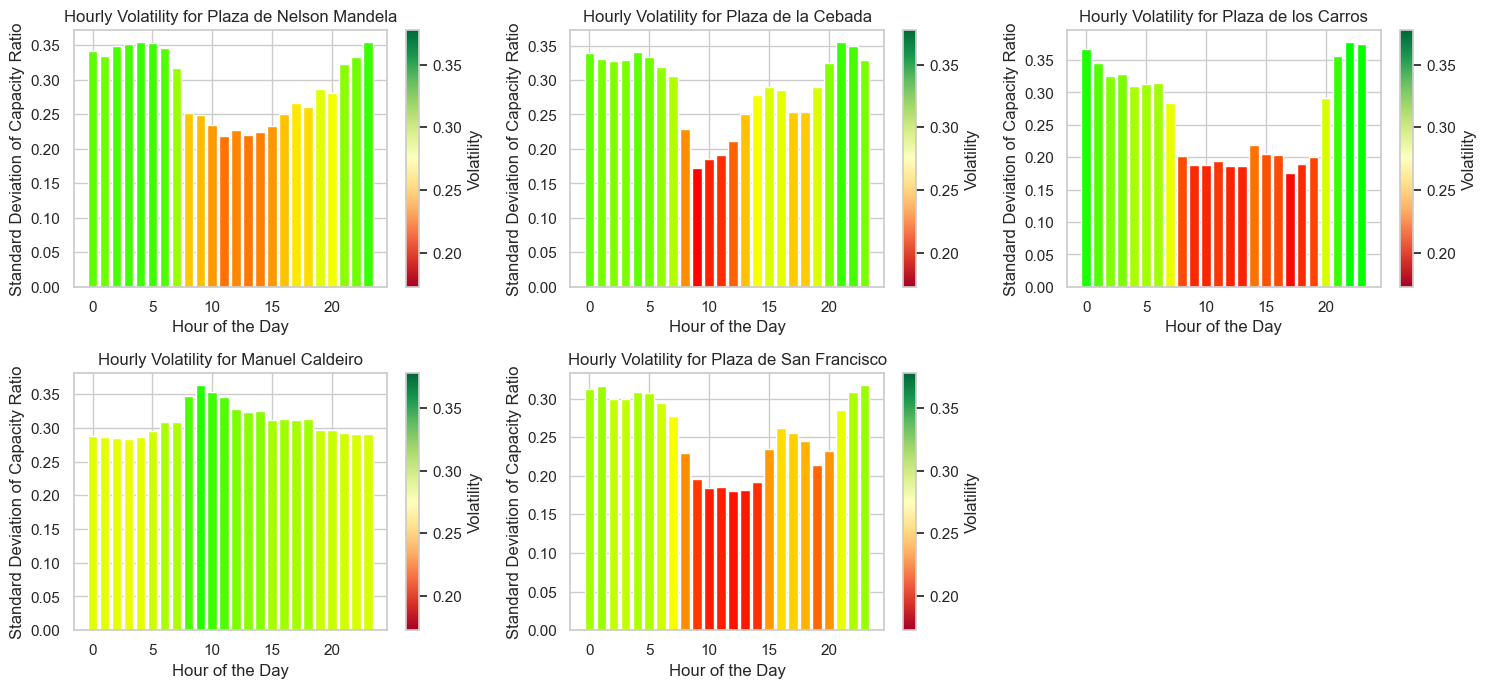

In [94]:
num_plots = len(top_5_stations_names_all_days_madrid)
grid_size = int(np.ceil(np.sqrt(num_plots))) 

plt.figure(figsize=(15, 10)) 

for i, station in enumerate(top_5_stations_names_all_days_madrid, 1):
    ax = plt.subplot(grid_size, grid_size, i) 
    station_data = hourly_volatility_top_5_stations_all_days_madrid[hourly_volatility_top_5_stations_all_days_madrid['name'] == station]
    colors = [get_gradient_color(val, min_volatility_top_5_all_days_madrid, max_volatility_top_5_all_days_madrid) for val in station_data['capacity_ratio']]
    plt.bar(station_data['hour'], station_data['capacity_ratio'], color=colors)
    plt.title(f'Hourly Volatility for {station}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Standard Deviation of Capacity Ratio')
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(min_volatility_top_5_all_days_madrid, max_volatility_top_5_all_days_madrid), cmap=plt.cm.RdYlGn), ax=ax, orientation='vertical', label='Volatility')

plt.tight_layout() 
plt.show()

Plaza de Nelson Mandela - there are periods of minimal acitivity and high capacity ratio from midnight to 7AM. In the morning and around lunch the capcity ratio  declines from around 10 am to 4pm. This suggests a heavy use by commuters during rush hours which result in decrease in available bikes. This is followed by an increase in the capacity after 8pm. Same behaviour is present for Plaza de los Carros with even heavier use by commuters between 8am and 7pm. 

In contrast, Manuel Caldeiro station, has higher usage between 12am and 6am, and then the activity decreases, suggesting that there is no movement around those hours in the station. 

The stations with the highest peaks of volatility might need more frequent rebalancing to ensure that there are enough bikes and free docks available to meet demand. Conversely, stations with less volatility might require less frequent intervention.

A calculation will be performed in order to get the estimation of number of trips per station. 

The same assumption will be performed as the one for the Dublin dataset so that we can have consistency. In the Dublin dataset the available_bikes are equal to the substraction between bike_stands and available_bike_stands, however in the Madrid dataset there are some inconsistencies. Hence, a calculation will be performed so that the same pattern is followed when it comes to the comparison. 

In [95]:
bike_data_aug_2022_madrid['available_bikes'] = bike_data_aug_2022_madrid['total_bases'] - bike_data_aug_2022_madrid['free_bases']

unique_stations = bike_data_aug_2022_madrid['name'].unique()

bike_usage_madrid = pd.DataFrame()

for name in unique_stations:
    filtered = bike_data_aug_2022_madrid[bike_data_aug_2022_madrid['name'] == name]

    filtered = filtered.sort_values(by=['_id'], ascending=True)
    
    filtered["trips"] = filtered["available_bikes"].diff()

    filtered_positive_trips = filtered[filtered['trips'] > 0]

    bike_usage_madrid = pd.concat([bike_usage_madrid, filtered_positive_trips])

bike_usage_madrid.head()

,name,reservations_count,light,total_bases,free_bases,longitude,no_available,address,latitude,dock_bikes,_id,capacity_ratio,available_bikes,trips
1848,Puerta del Sol A,1,0,30,28,-3.701834,0,Puerta del Sol nº 1,40.417214,0,2022-08-01 07:23:46.020034,0.000000,2,1.0
2376,Puerta del Sol A,0,0,30,26,-3.701834,0,Puerta del Sol nº 1,40.417214,3,2022-08-01 09:23:50.288990,0.100000,4,3.0
2640,Puerta del Sol A,0,0,30,24,-3.701834,0,Puerta del Sol nº 1,40.417214,5,2022-08-01 10:23:52.469673,0.166667,6,2.0
2904,Puerta del Sol A,0,0,30,23,-3.701834,0,Puerta del Sol nº 1,40.417214,6,2022-08-01 11:23:54.272286,0.200000,7,1.0
3696,Puerta del Sol A,0,0,30,22,-3.701834,0,Puerta del Sol nº 1,40.417214,7,2022-08-01 14:23:59.842848,0.233333,8,2.0


In [96]:
bike_usage_madrid['trips'] = bike_usage_madrid['trips'].astype(int)

In [97]:
station_trips_madrid = bike_usage_madrid.pivot_table(index='name', values='trips', aggfunc='sum')

station_trips_sorted_madrid = station_trips_madrid.sort_values(by='trips', ascending=False)

station_trips_sorted_madrid.head()

,trips
name,
General Pardiñas,4191
Fernando el Católico,3558
Paseo de la Esperanza,3326
Méndez Álvaro,3062
Marqués de Vadillo,943


In [98]:
top_5_stations_pivot_madrid = station_trips_sorted_madrid.nlargest(5, 'trips')

In [99]:
bottom_5_stations_pivot = station_trips_sorted_madrid.nsmallest(5, 'trips')

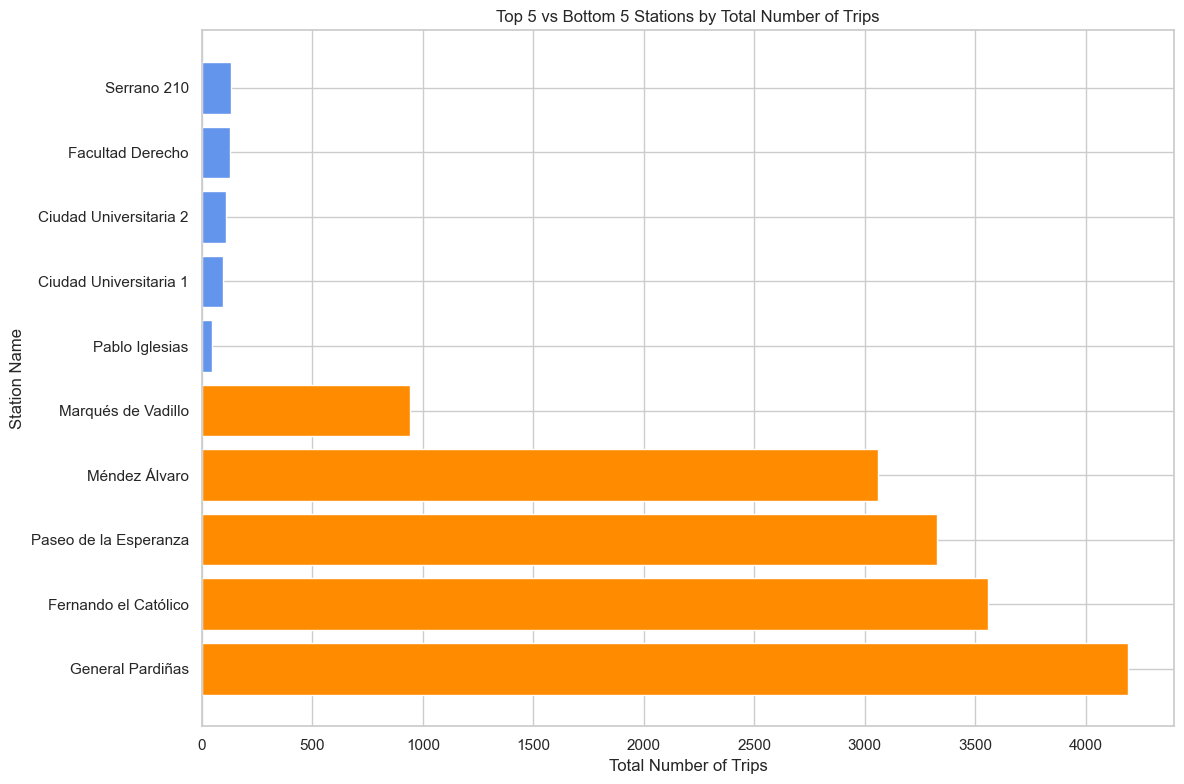

In [101]:
combined_top_bottom_stations_madrid = pd.concat([top_5_stations_pivot_madrid, bottom_5_stations_pivot])

combined_top_bottom_stations_madrid_reset = combined_top_bottom_stations_madrid.reset_index()

combined_top_bottom_stations_madrid_reset['station_type'] = ['Top' for _ in range(5)] + ['Bottom' for _ in range(5)]

plt.figure(figsize=(12, 8))

names = combined_top_bottom_stations_madrid_reset['name']
trips = combined_top_bottom_stations_madrid_reset['trips']
types = combined_top_bottom_stations_madrid_reset['station_type']

colors = ['#FF8C00' if t == 'Top' else '#6495ED' for t in types]  

plt.barh(y=names, width=trips, color=colors)

plt.title('Top 5 vs Bottom 5 Stations by Total Number of Trips')
plt.xlabel('Total Number of Trips')
plt.ylabel('Station Name')
plt.tight_layout()
plt.show()

Similar to the Dublin data, the stations with the highest number of trips are located in the city center. 

## Confidence Intervals

In [102]:
bikes_data_aug_2022_dublin.head()

,station id,time,name,bike_stands,available_bike_stands,available_bikes,address,latitude,longitude,capacity_ratio
0,1,2022-08-01 00:00:02,CLARENDON ROW,31,12,19,Clarendon Row,53.3409,-6.26250,0.612903
1,2,2022-08-01 00:00:02,BLESSINGTON STREET,20,5,14,Blessington Street,53.3568,-6.26814,0.700000
2,3,2022-08-01 00:00:02,BOLTON STREET,20,8,12,Bolton Street,53.3512,-6.26986,0.600000
3,4,2022-08-01 00:00:02,GREEK STREET,20,1,17,Greek Street,53.3469,-6.27298,0.850000
4,5,2022-08-01 00:00:02,CHARLEMONT PLACE,40,19,21,Charlemont Street,53.3307,-6.26018,0.525000


I want to find the average available bike stands in Dublin. I will use 95% confidence, meaning that the alpha will be 5%. I chose to use the 95% because it's the most popular as usually alpha is 5% as per standard.

In [103]:
X = bikes_data_aug_2022_dublin.iloc[:,4:5].values
X

array([[12],
       [ 5],
       [ 8],
       ...,
       [ 0],
       [18],
       [26]], dtype=int64)

In [104]:
X.size

168144

In [111]:
stats.t.interval(confidence = 0.95, df = len(X) -1, loc = np.mean(X), scale = stats.sem(X))

(array([19.93745056]), array([20.04389876]))

At a 95% confidence level, the available stands bike stands in dublin are between 19.94 and 20.04 for the month of August 2022 in Dublin.

The confidence interval found for bike stands is quite narrow. This means that most bike stations in Dublin seem to have a similar number of available stands. It's a good sign that the bike-sharing system is working well, with a balanced number of stands that are both in use and available at different stations.

This can be calculated with a formula as well - Lower and Upper limit

In [107]:
bikes_data_aug_2022_dublin.describe()

,station id,bike_stands,available_bike_stands,available_bikes,latitude,longitude,capacity_ratio
count,168144.000000,168144.000000,168144.000000,168144.000000,168144.000000,168144.000000,168144.000000
mean,59.035398,32.000000,19.990675,11.728893,53.345542,-6.264251,0.373734
std,34.192149,7.488066,11.135194,9.713809,0.007604,0.017932,0.298796
min,1.000000,16.000000,0.000000,0.000000,53.330100,-6.310020,0.000000
25%,29.000000,29.000000,12.000000,3.000000,53.339800,-6.275070,0.100000
50%,59.000000,30.000000,20.000000,10.000000,53.344600,-6.262980,0.325000
75%,89.000000,40.000000,29.000000,18.000000,53.350900,-6.251560,0.578947
max,117.000000,40.000000,40.000000,40.000000,53.360000,-6.230850,1.000000


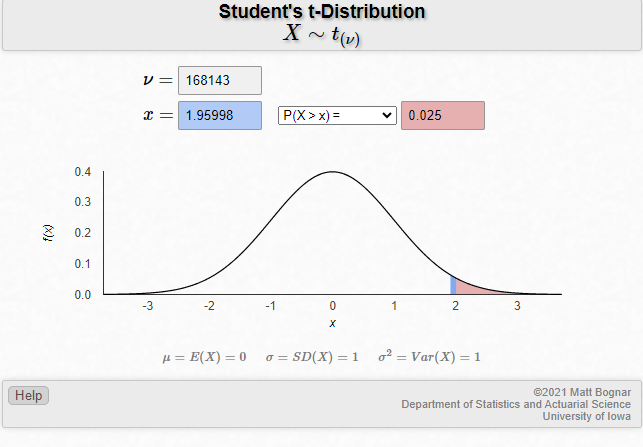

In [108]:
Image(filename='studenttbike.png')

LL = mean - (x bar * std / n-1 ** 0.5)  
UL = mean + (x bar * std / n-1 ** 0.5)

In [109]:
LL = 19.99 - (1.96 * 11.13 / (168143 ** 0.5))
LL

19.936799974583042

In [110]:
UL = 19.99 + (1.96 * 11.13 / (168143 ** 0.5))
UL

20.043200025416954

There is a slight difference in the result because I took the ronded numbers from the decsriptive statistics, but it matches the confidence interval using Student's T. at 95% confidence.

## Comparison between bikes in Dublin and Madrid

For the statistical comparison between Dublin and Madrid it is important to make sure that the two datasets are aligned. For this, only the relevant columns will be selected and then renamed so that they can follow the same naming convention in both datasets.

In [112]:
dublin_data_renamed = bike_usage.rename(columns={
    'name': 'station_name',
    'time': 'timestamp',
    'bike_stands': 'total_stands',
    'available_bike_stands': 'available_stands',
    'available_bikes': 'available_bikes'
})

dublin_data_renamed['timestamp'] = pd.to_datetime(dublin_data_renamed['timestamp'])

In [113]:
madrid_data_renamed = bike_usage_madrid.rename(columns={
    'name': 'station_name',
    '_id': 'timestamp',
    'total_bases': 'total_stands',
    'free_bases': 'available_stands',
    'available_bikes': 'available_bikes'
})

madrid_data_renamed['timestamp'] = pd.to_datetime(madrid_data_renamed['timestamp'])

In [114]:
aligned_columns = ['station_name', 'timestamp', 'total_stands', 'available_stands', 'available_bikes', 'trips']
dublin_data_aligned = dublin_data_renamed[aligned_columns]
madrid_data_aligned = madrid_data_renamed[aligned_columns]

dublin_data_aligned.head(), madrid_data_aligned.head()

(       station_name           timestamp  total_stands  available_stands  \
 1582  CLARENDON ROW 2022-08-01 07:00:02            31                10   
 1808  CLARENDON ROW 2022-08-01 08:00:02            31                 9   
 2260  CLARENDON ROW 2022-08-01 10:00:02            31                 9   
 2373  CLARENDON ROW 2022-08-01 10:30:02            31                 8   
 2486  CLARENDON ROW 2022-08-01 11:00:02            31                 5   
 
       available_bikes  trips  
 1582               21      2  
 1808               22      1  
 2260               22      2  
 2373               23      1  
 2486               26      3  ,
           station_name                  timestamp  total_stands  \
 1848  Puerta del Sol A 2022-08-01 07:23:46.020034            30   
 2376  Puerta del Sol A 2022-08-01 09:23:50.288990            30   
 2640  Puerta del Sol A 2022-08-01 10:23:52.469673            30   
 2904  Puerta del Sol A 2022-08-01 11:23:54.272286            30   
 3696  Pu

In [115]:
dublin_data_aligned.describe()

,total_stands,available_stands,available_bikes,trips
count,43375.000000,43375.000000,43375.000000,43375.000000
mean,31.611458,17.936184,13.593729,2.382363
std,7.485137,10.459516,9.153790,2.380677
min,16.000000,0.000000,1.000000,1.000000
25%,29.000000,10.000000,6.000000,1.000000
50%,30.000000,18.000000,12.000000,2.000000
75%,40.000000,26.000000,20.000000,3.000000
max,40.000000,39.000000,40.000000,28.000000


In [116]:
madrid_data_aligned.describe()

,total_stands,available_stands,available_bikes,trips
count,59599.000000,59599.000000,59599.000000,59599.000000
mean,23.933405,10.906425,13.026980,2.260994
std,1.836567,5.290496,5.237169,2.010999
min,12.000000,0.000000,1.000000,1.000000
25%,24.000000,7.000000,9.000000,1.000000
50%,24.000000,11.000000,13.000000,2.000000
75%,24.000000,15.000000,17.000000,3.000000
max,30.000000,29.000000,30.000000,26.000000


In [118]:
def check_assumptions(data, column):
    stat, p_value_norm = shapiro(data[column])
    norm_result = "Normal" if p_value_norm > 0.05 else "Not Normal"

    stat, p_value_var = levene(dublin_data_aligned[column], madrid_data_aligned[column])
    var_result = "Equal Variances" if p_value_var > 0.05 else "Unequal Variances"

    return norm_result, var_result, p_value_norm, p_value_var

columns_to_check = ['available_bikes', 'trips', 'available_stands', 'total_stands']

normality_variance_results = {}

for column in columns_to_check:
    normality_variance_results[column] = check_assumptions(dublin_data_aligned, column) + check_assumptions(madrid_data_aligned, column)

normality_variance_df = pd.DataFrame(normality_variance_results, index=['Dublin Normality', 'Dublin Variances', 'Dublin p-value (Normality)', 'Dublin p-value (Variances)',
                                                                        'Madrid Normality', 'Madrid Variances', 'Madrid p-value (Normality)', 'Madrid p-value (Variances)']).T

normality_variance_df


,Dublin Normality,Dublin Variances,Dublin p-value (Normality),Dublin p-value (Variances),Madrid Normality,Madrid Variances,Madrid p-value (Normality),Madrid p-value (Variances)
available_bikes,Not Normal,Unequal Variances,0.0,0.0,Not Normal,Unequal Variances,0.0,0.0
trips,Not Normal,Unequal Variances,0.0,0.0,Not Normal,Unequal Variances,0.0,0.0
available_stands,Not Normal,Unequal Variances,0.0,0.0,Not Normal,Unequal Variances,0.0,0.0
total_stands,Not Normal,Unequal Variances,0.0,0.0,Not Normal,Unequal Variances,0.0,0.0


The data is not normally distributed (p-value ≈ 0.0). Considering that, parametric tests like the T-test and ANOVA, which assume normality, won't be suitable. Instead, the analysis will focus on non-parametric alternatives.

When dealing with large datasets, sampling is an effective approach to make the analysis more manageable, however it is essential to ensure that the sample is representative of the population to make valid inferences. 


In [120]:
# Sampling 5% of each dataset with a random state for reproducibility

dublin_data_sample = dublin_data_renamed.sample(frac=0.05, random_state=42)
dublin_data_sample.reset_index(drop=True, inplace=True)

madrid_data_sample = madrid_data_renamed.sample(frac=0.05, random_state=42)
madrid_data_sample.reset_index(drop=True, inplace=True)

sample_sizes = (dublin_data_sample.shape, madrid_data_sample.shape)
sample_sizes, dublin_data_sample.head(), madrid_data_sample.head()


(((2169, 11), (2980, 14)),
    station id           timestamp              station_name  total_stands  \
 0         115 2022-08-08 23:30:02          KILLARNEY STREET            30   
 1          45 2022-08-10 17:00:03            DEVERELL PLACE            30   
 2          87 2022-08-17 23:00:02   COLLINS BARRACKS MUSEUM            38   
 3          56 2022-08-06 15:30:02        MOUNT STREET LOWER            40   
 4          80 2022-08-18 23:30:02  ST JAMES HOSPITAL (LUAS)            40   
 
    available_stands  available_bikes                   address  latitude  \
 0                 0               30          Killarney Street   53.3548   
 1                 6               24            Deverell Place   53.3515   
 2                23               15   Collins Barracks Museum   53.3475   
 3                37                3        Mount Street Lower   53.3380   
 4                39                1  St James Hospital (Luas)   53.3414   
 
    longitude  capacity_ratio  trips  


It is important to make sure that the sample is representative of the population. A representative sample accurately reflects the distribution and characteristics of the larger population, which is crucial for the validity of inferential statistics.  

To verify the samples the Empirical Cumulative Distribution Function will be plotted. The ECDF plot provides a comprehensive view of the data distribution, showing the proportion of data points that fall below each value. 

In [121]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

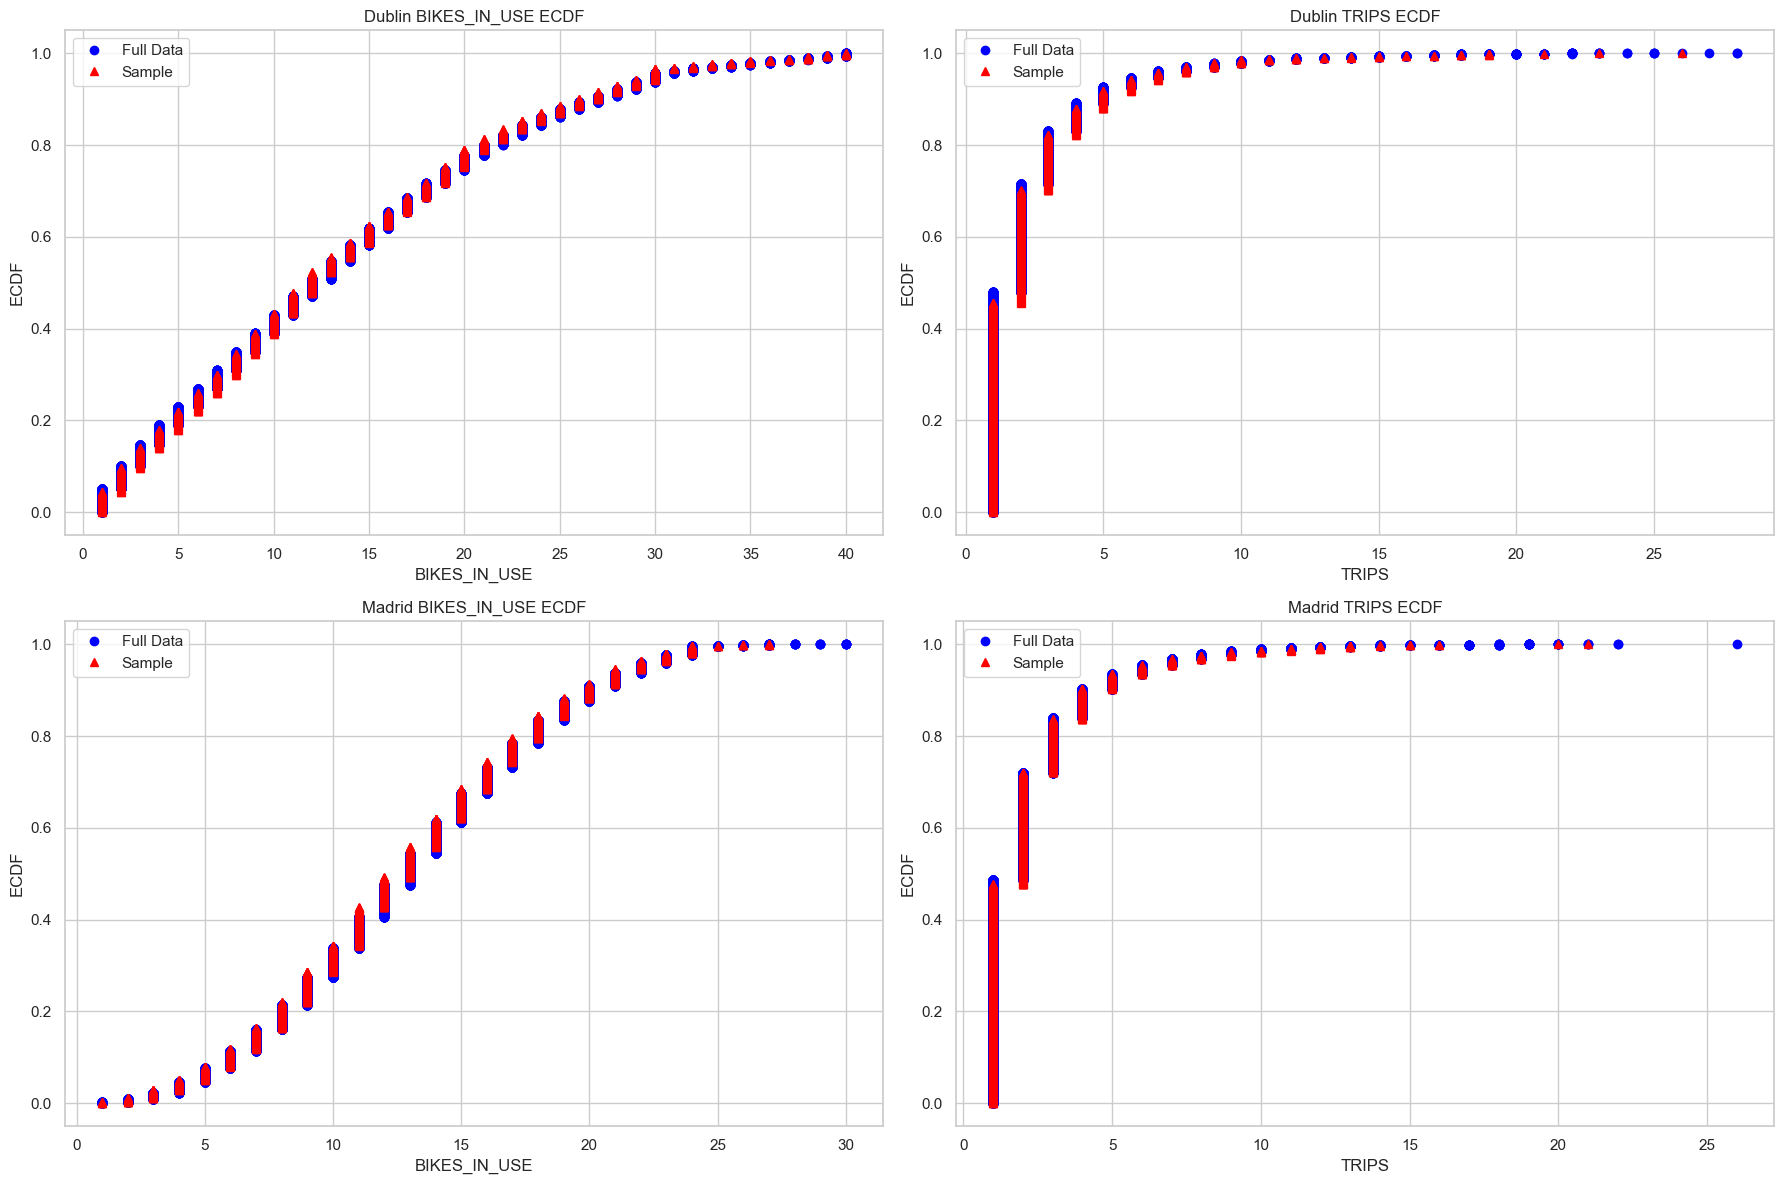

In [122]:
plt.figure(figsize=(18, 12))

colors = ['blue', 'red']
markers = ['o', '^']

# Dublin 'BIKES_IN_USE'
plt.subplot(2, 2, 1)
x_full, y_full = ecdf(dublin_data_renamed['available_bikes'])
x_sample, y_sample = ecdf(dublin_data_sample['available_bikes'])
plt.plot(x_full, y_full, marker=markers[0], linestyle='none', color=colors[0], label='Full Data')
plt.plot(x_sample, y_sample, marker=markers[1], linestyle='none', color=colors[1], label='Sample')
plt.title('Dublin BIKES_IN_USE ECDF')
plt.xlabel('BIKES_IN_USE')
plt.ylabel('ECDF')
plt.legend()

# Dublin 'TRIPS'
plt.subplot(2, 2, 2)
x_full, y_full = ecdf(dublin_data_renamed['trips'])
x_sample, y_sample = ecdf(dublin_data_sample['trips'])
plt.plot(x_full, y_full, marker=markers[0], linestyle='none', color=colors[0], label='Full Data')
plt.plot(x_sample, y_sample, marker=markers[1], linestyle='none', color=colors[1], label='Sample')
plt.title('Dublin TRIPS ECDF')
plt.xlabel('TRIPS')
plt.ylabel('ECDF')
plt.legend()

# Madrid 'BIKES_IN_USE'
plt.subplot(2, 2, 3)
x_full, y_full = ecdf(madrid_data_renamed['available_bikes'])
x_sample, y_sample = ecdf(madrid_data_sample['available_bikes'])
plt.plot(x_full, y_full, marker=markers[0], linestyle='none', color=colors[0], label='Full Data')
plt.plot(x_sample, y_sample, marker=markers[1], linestyle='none', color=colors[1], label='Sample')
plt.title('Madrid BIKES_IN_USE ECDF')
plt.xlabel('BIKES_IN_USE')
plt.ylabel('ECDF')
plt.legend()

# Madrid 'TRIPS'
plt.subplot(2, 2, 4)
x_full, y_full = ecdf(madrid_data_renamed['trips'])
x_sample, y_sample = ecdf(madrid_data_sample['trips'])
plt.plot(x_full, y_full, marker=markers[0], linestyle='none', color=colors[0], label='Full Data')
plt.plot(x_sample, y_sample, marker=markers[1], linestyle='none', color=colors[1], label='Sample')
plt.title('Madrid TRIPS ECDF')
plt.xlabel('TRIPS')
plt.ylabel('ECDF')
plt.legend()

plt.tight_layout()
plt.show()


The ECDF plots confirm that the samples are representative of the full datasets for both cities and both variables of interest. The curves of the samples closely follow those of the full datasets, suggesting that the samples maintain the underlying distribution characteristics.

## Hypotheses testing

###  Mann-Whitney U test

Hypothesis: 

Null (H0): The distribution of 'trips' is the same across both Dublin and Madrid datasets. This implies there is no significant difference in the central tendency (median) of 'trips' between the two cities.

Alternative (H1): The distribution of 'trips' is different between Dublin and Madrid. This would imply a significant difference in the central tendency of 'trips' between the two cities.

In [123]:
u_statistic, p_val_mw = mannwhitneyu(dublin_data_sample['trips'], madrid_data_sample['trips'], alternative='two-sided')

print("Mann-Whitney U Test results for 'trips':")
print("U-statistic:", u_statistic)
print("P-value:", p_val_mw)

if p_val_mw < 0.05:
    print("We reject the null hypothesis. There is sufficient evidence to suggest a significant difference in the distribution of 'trips' between Dublin and Madrid.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the distribution of 'trips' between Dublin and Madrid.")

Mann-Whitney U Test results for 'trips':
U-statistic: 3323361.5
P-value: 0.06404087780551801
We fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the distribution of 'trips' between Dublin and Madrid.


### Chi-squared test

Hypothesis: 

Null (H0): There's no association between the city (Dublin or Madrid) and the day of the week for 'trips' (they are independent).

Alternative (H1): There is an association between the city and the day of the week for 'trips' (they are not independent).

In [125]:
dublin_weekday = dublin_data_sample['timestamp'].dt.day_name()
madrid_weekday = madrid_data_sample['timestamp'].dt.day_name()

combined_weekday_chi = pd.concat([
    dublin_weekday.rename('weekday').to_frame().assign(city='Dublin'),
    madrid_weekday.rename('weekday').to_frame().assign(city='Madrid')
])

contingency_table_weekday = pd.crosstab(combined_weekday_chi['weekday'], combined_weekday_chi['city'])

chi2_stat_weekday, p_val_chi_weekday, dof_chi_weekday, expected_chi_weekday = chi2_contingency(contingency_table_weekday)

contingency_table_weekday, chi2_stat_weekday, p_val_chi_weekday

(city       Dublin  Madrid
 weekday                  
 Friday        299     398
 Monday        373     470
 Saturday      258     361
 Sunday        231     349
 Thursday      272     390
 Tuesday       372     506
 Wednesday     364     506,
 3.376261190716455,
 0.7603531350606028)

In [126]:
if p_val_chi_weekday < 0.05:
    print("We reject the null hypothesis. There is sufficient evidence to suggest a significant association between the day of the week and the city in terms of 'trips'.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest a significant association between the day of the week and the city in terms of 'trips'.")

We fail to reject the null hypothesis. There is not enough evidence to suggest a significant association between the day of the week and the city in terms of 'trips'.


The test suggests that the day of the week is not significantly associated with the difference in 'trips' between Dublin and Madrid. This might imply that the pattern of bike usage across the week is similar in both cities, at least as far as the 'trips' data can tell.

### Welch's T-test

Hypothesis:

Null (H0): The mean number of 'TRIPS' in Dublin is equal to the mean number of 'TRIPS' in Madrid.

Alternative (H1): The mean number of 'TRIPS' in Dublin is not equal to the mean number of 'TRIPS' in Madrid.

In [127]:
t_stat_bikes, p_val_ttest_trips = ttest_ind(dublin_data_sample['trips'], madrid_data_sample['trips'], equal_var=False)

if p_val_ttest_trips < 0.05:
    print("We reject the null hypothesis. There is sufficient evidence to suggest a significant difference in the mean number of 'trips' between Dublin and Madrid.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the mean number of 'trips' between Dublin and Madrid.")


We reject the null hypothesis. There is sufficient evidence to suggest a significant difference in the mean number of 'trips' between Dublin and Madrid.


### ANOVA / Kruskal-Wallis H Test

In order to see if there is significant difference in the bike usage within the different times of the day, a new categorization will be introduced, which will categorize the data in the following way: 

Morning: 6 AM - 12 PM.
Afternoon: 12 PM - 6 PM.
Evening/Night: 6 PM - 6 AM.

After doing so, either ANOVA or Kruskal-Wallis H Test (Non-parametric) will be performed, as we need two or more groups in order to perform those tests. 

In [128]:
dublin_hours = dublin_data_sample['timestamp'].dt.hour
madrid_hours = madrid_data_sample['timestamp'].dt.hour

def categorize_time_of_day(hours):
    conditions = [
        (hours >= 6) & (hours < 12),  # Morning
        (hours >= 12) & (hours < 18),  # Afternoon
        (hours < 6) | (hours >= 18),  # Evening/Night
    ]
    categories = ['Morning', 'Afternoon', 'Evening/Night']
    return np.select(conditions, categories, default='Unknown')

dublin_time_category = categorize_time_of_day(dublin_hours)
madrid_time_category = categorize_time_of_day(madrid_hours)

dublin_for_anova = pd.DataFrame({'TimeOfDay': dublin_time_category, 'AvailableBikes': dublin_data_sample['available_bikes']})
madrid_for_anova = pd.DataFrame({'TimeOfDay': madrid_time_category, 'AvailableBikes': madrid_data_sample['available_bikes']})

dublin_for_anova.head(), madrid_for_anova.head()


(       TimeOfDay  AvailableBikes
 0  Evening/Night              30
 1      Afternoon              24
 2  Evening/Night              15
 3      Afternoon               3
 4  Evening/Night               1,
        TimeOfDay  AvailableBikes
 0        Morning              19
 1        Morning              10
 2        Morning              20
 3  Evening/Night              21
 4  Evening/Night               6)

In [129]:
combined_for_anova = pd.concat([dublin_for_anova.assign(City='Dublin'), madrid_for_anova.assign(City='Madrid')])

combined_for_anova.head()


,TimeOfDay,AvailableBikes,City
0,Evening/Night,30,Dublin
1,Afternoon,24,Dublin
2,Evening/Night,15,Dublin
3,Afternoon,3,Dublin
4,Evening/Night,1,Dublin


A check for normality will be performed again in order to determine which test will be used.


Dublin - Afternoon Group:
Shapiro-Wilk Test: Stat=0.9557032585144043, P-value=2.287263802837336e-13


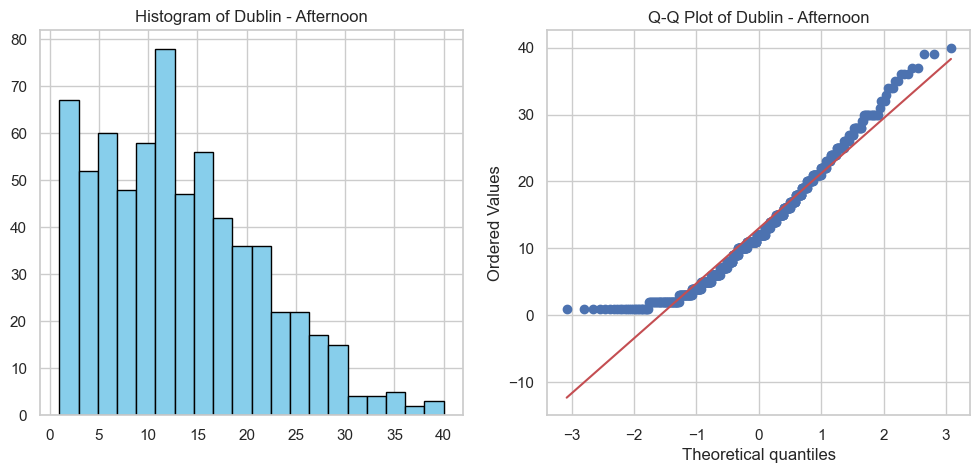


Dublin - Evening/Night Group:
Shapiro-Wilk Test: Stat=0.9512731432914734, P-value=6.349377501463957e-16


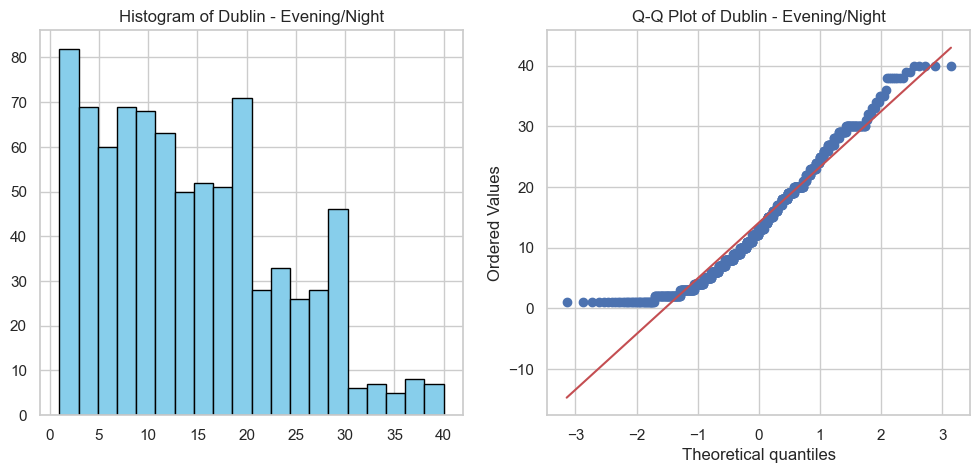


Dublin - Morning Group:
Shapiro-Wilk Test: Stat=0.9469258189201355, P-value=1.0255138853723905e-14


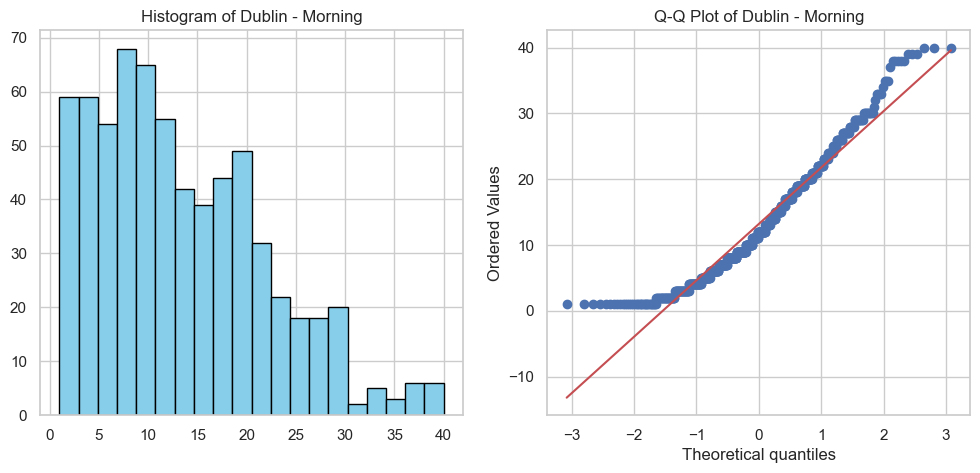


Madrid - Afternoon Group:
Shapiro-Wilk Test: Stat=0.9882240891456604, P-value=4.899676241620909e-06


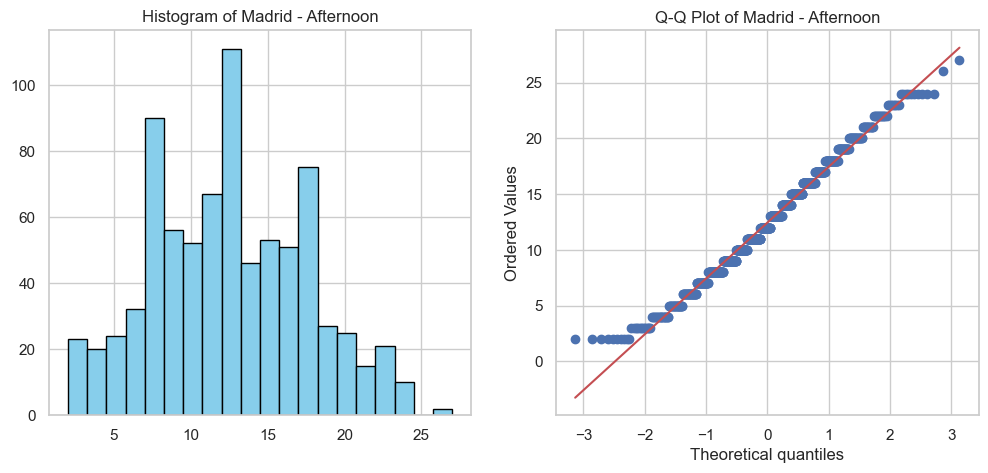


Madrid - Evening/Night Group:
Shapiro-Wilk Test: Stat=0.9874968528747559, P-value=8.261318851232602e-10


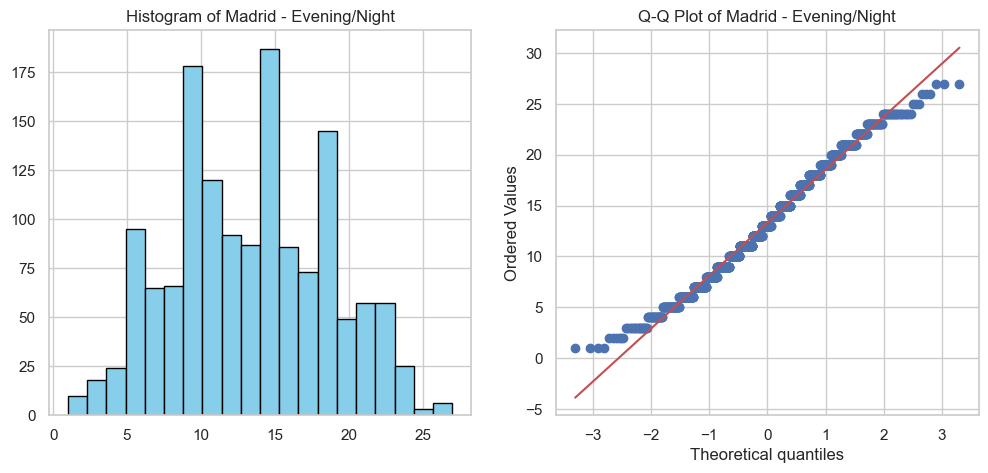


Madrid - Morning Group:
Shapiro-Wilk Test: Stat=0.9843881130218506, P-value=4.4737086568602535e-07


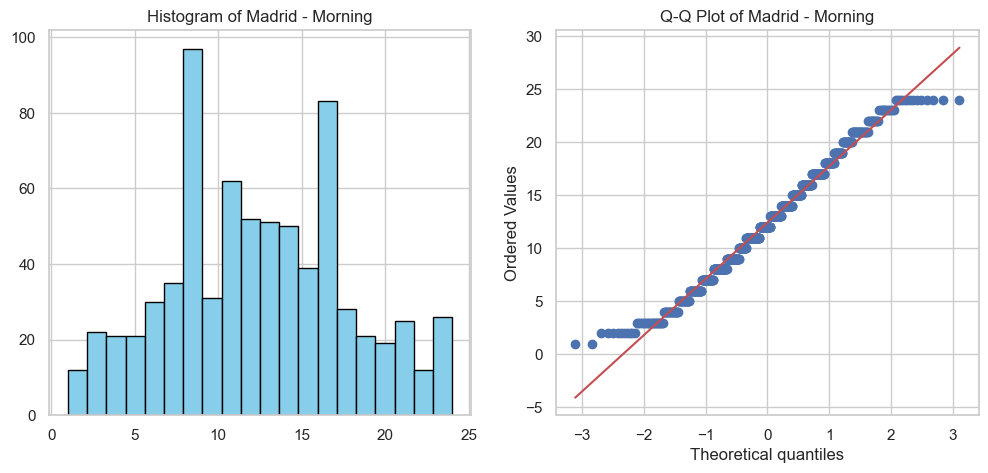

In [461]:
def check_normality(grouped_data):
    for (city, time_of_day), group in grouped_data:
        print(f"\n{city} - {time_of_day} Group:")

        stat, p_value = stats.shapiro(group['AvailableBikes'])
        print(f"Shapiro-Wilk Test: Stat={stat}, P-value={p_value}")

        # Histogram
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.hist(group['AvailableBikes'], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {city} - {time_of_day}')
        
        # Q-Q plot
        plt.subplot(1, 2, 2)
        stats.probplot(group['AvailableBikes'], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {city} - {time_of_day}')
        plt.show()

grouped_data = combined_for_anova.groupby(['City', 'TimeOfDay'])

check_normality(grouped_data)


Given the results from the Shapiro-Wilk tests, which indicate deviations from normality in all time-of-day groups for both Dublin and Madrid, Kruskal-Wallis H Test will be used. This is a non-parametric alternative to ANOVA, and it doesn't assume normality of the data. 

In [130]:
dublin_morning = dublin_for_anova[dublin_for_anova['TimeOfDay'] == 'Morning']['AvailableBikes']
dublin_afternoon = dublin_for_anova[dublin_for_anova['TimeOfDay'] == 'Afternoon']['AvailableBikes']
dublin_evening = dublin_for_anova[dublin_for_anova['TimeOfDay'] == 'Evening/Night']['AvailableBikes']

madrid_morning = madrid_for_anova[madrid_for_anova['TimeOfDay'] == 'Morning']['AvailableBikes']
madrid_afternoon = madrid_for_anova[madrid_for_anova['TimeOfDay'] == 'Afternoon']['AvailableBikes']
madrid_evening = madrid_for_anova[madrid_for_anova['TimeOfDay'] == 'Evening/Night']['AvailableBikes']

dublin_stat, dublin_p = kruskal(dublin_morning, dublin_afternoon, dublin_evening)

madrid_stat, madrid_p = kruskal(madrid_morning, madrid_afternoon, madrid_evening)

print("\nDublin - Kruskal-Wallis H Test:")
if dublin_p < 0.05:
    print("We reject the null hypothesis. There is sufficient evidence to suggest a significant difference in the median number of 'AvailableBikes' across different times of the day in Dublin.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the median number of 'AvailableBikes' across different times of the day in Dublin.")

print("\nMadrid - Kruskal-Wallis H Test:")
if madrid_p < 0.05:
    print("We reject the null hypothesis. There is sufficient evidence to suggest a significant difference in the median number of 'AvailableBikes' across different times of the day in Madrid.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the median number of 'AvailableBikes' across different times of the day in Madrid.")


Dublin - Kruskal-Wallis H Test:
We fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the median number of 'AvailableBikes' across different times of the day in Dublin.

Madrid - Kruskal-Wallis H Test:
We reject the null hypothesis. There is sufficient evidence to suggest a significant difference in the median number of 'AvailableBikes' across different times of the day in Madrid.


The comprehensive analyses indicate that while the distribution of trips between Dublin and Madrid might be similar, the average number of trips and the dynamics of bike usage throughout the day differ between the cities. These insights should be considered by urban planners and policymakers aiming to optimize bike-sharing systems and improve urban mobility strategies in both Dublin and Madrid.